# Disclaimer (really important!)
- This is my **first** data science project.
- **My goal** is to practice, showcase what I have already learned, and improve through feedback.
- I have dedicated a significant amount of time to complete this project. **If you have any tips or suggestions, I would be happy to hear them**.
- If you liked it, please leave an **upvote**. It's free and motivates me to post other projects.

# 1. Business Understanding

- In the "Business Understanding" phase of CRISP-DM, the goal is to fully comprehend the context and requirements of the business problem being addressed.
- This involves identifying success criteria, setting goals, and understanding the constraints and challenges involved.

## 1.1 Objective of this project
The objective of this project is to develop a robust and accurate regression model to predict the sale prices of houses in Ames, Iowa. By applying advanced machine learning techniques and statistical analysis, our goal is to understand complex patterns in the data, identify key predictive variables, and create a model that can generalize well to predict sale prices of unknown houses. This project aims not only to create a precise prediction model but also to explore valuable insights into the factors that most influence house prices in this specific market.. 
[More information HERE](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

## 1.2 Data description

Here's a brief version of what you'll find in the data description file.

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass**: The building class
* **MSZoning**: The general zoning classification
* **LotFrontage**: Linear feet of street connected to property
* **LotArea**: Lot size in square feet
* **Street**: Type of road access
* **Alley**: Type of alley access
* **LotShape**: General shape of property
* **LandContour**: Flatness of the property
* **Utilities**: Type of utilities available
* **LotConfig**: Lot configuration
* **LandSlope**: Slope of property
* **Neighborhood**: Physical locations within Ames city limits
* **Condition1**: Proximity to main road or railroad
* **Condition2**: Proximity to main road or railroad (if a second is present)
* **BldgType**: Type of dwelling
* **HouseStyle**: Style of dwelling
* **OverallQual**: Overall material and finish quality
* **OverallCond**: Overall condition rating
* **YearBuilt**: Original construction date
* **YearRemodAdd**: Remodel date
* **RoofStyle**: Type of roof
* **RoofMatl**: Roof material
* **Exterior1st**: Exterior covering on house
* **Exterior2nd**: Exterior covering on house (if more than one material)
* **MasVnrType**: Masonry veneer type
* **MasVnrArea**: Masonry veneer area in square feet
* **ExterQual**: Exterior material quality
* **ExterCond**: Present condition of the material on the exterior
* **Foundation**: Type of foundation
* **BsmtQual**: Height of the basement
* **BsmtCond**: General condition of the basement
* **BsmtExposure**: Walkout or garden level basement walls
* **BsmtFinType1**: Quality of basement finished area
* **BsmtFinSF1**: Type 1 finished square feet
* **BsmtFinType2**: Quality of second finished area (if present)
* **BsmtFinSF2**: Type 2 finished square feet
* **BsmtUnfSF**: Unfinished square feet of basement area
* **TotalBsmtSF**: Total square feet of basement area
* **Heating**: Type of heating
* **HeatingQC**: Heating quality and condition
* **CentralAir**: Central air conditioning
* **Electrical**: Electrical system
* **1stFlrSF**: First Floor square feet
* **2ndFlrSF**: Second floor square feet
* **LowQualFinSF**: Low quality finished square feet (all floors)
* **GrLivArea**: Above grade (ground) living area square feet
* **BsmtFullBath**: Basement full bathrooms
* **BsmtHalfBath**: Basement half bathrooms
* **FullBath**: Full bathrooms above grade
* **HalfBath**: Half baths above grade
* **Bedroom**: Number of bedrooms above basement level
* **Kitchen**: Number of kitchens
* **KitchenQual**: Kitchen quality
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **Functional**: Home functionality rating
* **Fireplaces**: Number of fireplaces
* **FireplaceQu**: Fireplace quality
* **GarageType**: Garage location
* **GarageYrBlt**: Year garage was built
* **GarageFinish**: Interior finish of the garage
* **GarageCars**: Size of garage in car capacity
* **GarageArea**: Size of garage in square feet
* **GarageQual**: Garage quality
* **GarageCond**: Garage condition
* **PavedDrive**: Paved driveway
* **WoodDeckSF**: Wood deck area in square feet
* **OpenPorchSF**: Open porch area in square feet
* **EnclosedPorch**: Enclosed porch area in square feet
* **3SsnPorch**: Three season porch area in square feet
* **ScreenPorch**: Screen porch area in square feet
* **PoolArea**: Pool area in square feet
* **PoolQC**: Pool quality
* **Fence**: Fence quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **MiscVal**: Value of miscellaneous feature
* **MoSold**: Month Sold
* **YrSold**: Year Sold
* **SaleType**: Type of sale
* **SaleCondition**: Condition of sale

[More information HERE](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

# 2. Data Understanding

- In the "Data Understanding" phase of CRISP-DM, the goal is to explore and comprehend the available data.
- This involves analyzing data quality, identifying patterns, understanding variable distribution, and evaluating the relevance of the contained information.

## 2.1 - Importing the libraries

In [1]:
import warnings # I'm adding this code after completing the project to make it cleaner. 
                # However, I want to emphasize that warnings are very important during the project development phase.
warnings.filterwarnings("ignore")

# Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Data manipulation libraries
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Evaluation libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 'Time' libraries
from tqdm import tqdm
import time

# ML libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


## 2.2 - Helper functions

In [2]:
def percent_missing(df, column):
    missing = df.isnull().sum()
    percent_missing = missing / data.shape[0] * 100
    print(percent_missing);
    
def missing_heatmap(df):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.isnull(), cmap='seismic')
    plt.show();
    
def corr_with(numeric_cols, df, column):
    correlations = numeric_cols.corrwith(df[column])
    plt.figure(figsize=(15, 10))
    correlations.plot(kind='bar')
    plt.title(f'Level of correlation with {column}')
    plt.xlabel('Column')
    plt.ylabel('Correlation')
    plt.show()

def heatmap(numeric_cols):
    plt.figure(figsize=(30, 30))
    sns.heatmap(numeric_cols.corr(), cmap='bwr', annot=True, linewidth=3)

def limits(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr

def how_many_outliers(dataframe, column, inf_threshold, sup_threshold):
    inf_lim, sup_lim = limits(dataframe[column])
    inf = dataframe.loc[dataframe[column] < inf_threshold].shape[0]
    sup = dataframe.loc[dataframe[column] > sup_threshold].shape[0]
    total = inf + sup
    print(f'There are about {inf} outliers below the lower limit.')
    print(f'There are about {sup} outliers above the upper limit.')
    print(f'There are about {total} outliers in total.')

def remove_outliers(dataframe, column):
    n_of_rows = dataframe.shape[0]
    inf_lim, sup_lim = limits(dataframe[column])
    dataframe = dataframe.loc[(dataframe[column] >= inf_lim) & (dataframe[column] <= sup_lim), :]
    removed_rows = n_of_rows - dataframe.shape[0]
    return dataframe, removed_rows

def remove_upper_band_outliers(dataframe, column):
    n_of_rows = dataframe.shape[0]
    inf_lim, sup_lim = limits(dataframe[column])
    dataframe = dataframe.loc[(dataframe[column] <= sup_lim), :]
    removed_rows = n_of_rows - dataframe.shape[0]
    return dataframe, removed_rows   

def countplot(dataframe,column, x_label_orient=False):
    print(dataframe[column].value_counts())
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=dataframe, hue=column)
    if x_label_orient:
        ax.tick_params(axis='x', rotation=90)

def displot(column):
    dist = sns.displot(column, kde=True)
    dist.fig.set_size_inches(10,5)

def barplot(column, limit=False, vert_orient=False):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts())
    if limit:
        ax.set_xlim(limits(column))
    if vert_orient:
        ax.tick_params(axis='x', rotation=90)

def boxplot(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=column, ax=ax1)
    ax2.set_xlim(limits(column))
    sns.boxplot(x=column, ax=ax2)

### Loading the Data

In [3]:
data = pd.read_csv(r'C:\Users\Henrique\Documents\Projects\Kaggle\01 - House Prices - Advanced Regression Techniques\train.csv')
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', None)

In [4]:
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [5]:
data.shape

(1460, 81)

-  Analyzing the data, I believe that I can already exclude some columns as I think they won't be good predictors.
- Having fewer columns will make our model simpler and facilitate the deployment phase.

In [6]:
data.drop(['Id', 'OverallCond', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'MasVnrArea', 'LandContour', 'LandSlope', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional'], axis=1, inplace=True)

### Checking the shape (lines, columns) of the data

In [7]:
data.shape

(1460, 64)

### Checking the column name, non-null count and Dtypes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

### Verifying the percentage of missing values

In [9]:
percent_missing(data, 'SalePrice')

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
Utilities         0.000000
LotConfig         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
CentralAir        0.000000
Electrical        0.068493
1stFlrSF          0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
H

### Statistical summary

In [10]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual    YearBuilt  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315  1971.267808   
std      42.300571    24.284752    9981.264932     1.382997    30.202904   
min      20.000000    21.000000    1300.000000     1.000000  1872.000000   
25%      20.000000    59.000000    7553.500000     5.000000  1954.000000   
50%      50.000000    69.000000    9478.500000     6.000000  1973.000000   
75%      70.000000    80.000000   11601.500000     7.000000  2000.000000   
max     190.000000   313.000000  215245.000000    10.000000  2010.000000   

       YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    1984.865753   443.639726    46.549315   567.240411  1057.429452   
std       20.645407   456.098091   161.319273   441.866955   438.705324   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1967.000000     0.000000     0.000000   223.000000   795.750000   
50%     1994.000000   383.500000     0.000000   477.500000   991.500000   
75%     2004.000000   712.250000     0.000000   808.000000  1298.250000   
max     2010.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean   1162.626712  1515.463699      0.425342      0.057534     1.565068   
std     386.587738   525.480383      0.518911      0.238753     0.550916   
min     334.000000   334.000000      0.000000      0.000000     0.000000   
25%     882.000000  1129.500000      0.000000      0.000000     1.000000   
50%    1087.000000  1464.000000      0.000000      0.000000     2.000000   
75%    1391.250000  1776.750000      1.000000      0.000000     2.000000   
max    4692.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea  OpenPorchSF  EnclosedPorch  \
count  1379.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1978.506164     1.767123   472.980137    46.660274      21.954110   
std      24.689725     0.747315   213.804841    66.256028      61.119149   
min    1900.000000     0.000000     0.000000     0.000000       0.000000   
25%    1961.000000     1.000000   334.500000     0.000000       0.000000   
50%    1980.000000     2.000000   480.000000    25.000000       0.000000   
75%    2002.000000     2.000000   576.000000    68.000000       0.000000   
max    2010.000000     4.000000  1418.000000   547.000000     552.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009

### Checking the missing values visually.
- Red values represent missing values.
- Dark blue values represent non-missing data.

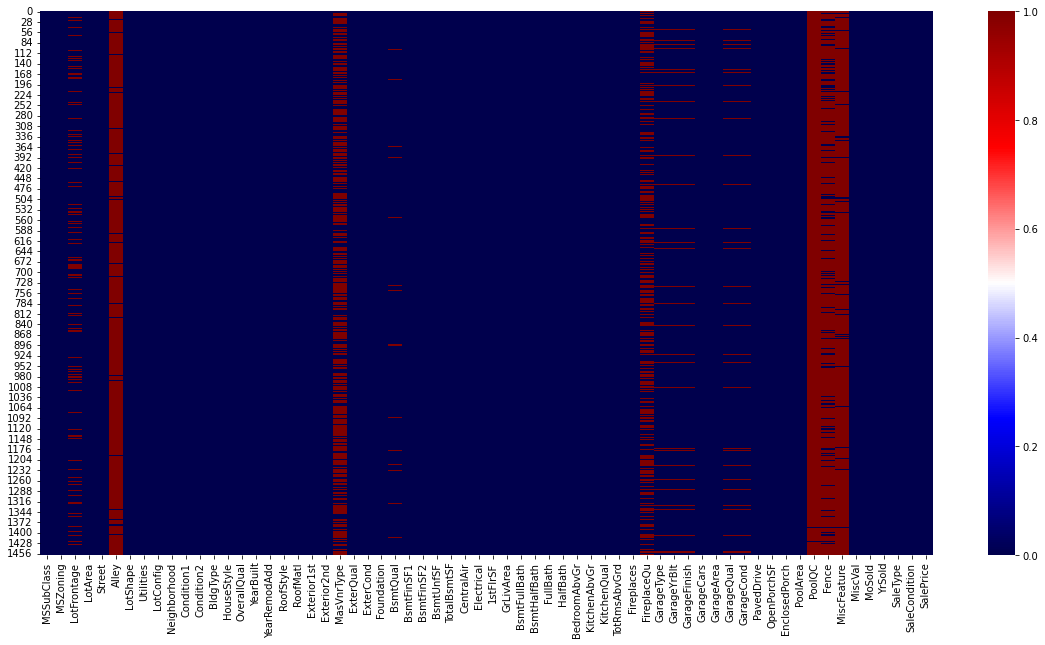

In [11]:
missing_heatmap(data)

# 3. Data Preparation

- In the "Data Preparation" phase of CRISP-DM, the goal is to perform necessary transformations on the data so that they can be used in the modeling phase.
- This includes handling missing data, scaling normalization, selecting relevant variables, and other preparation steps.

### We will remove columns with more than 650 missing values.

In [12]:
for column in data:
    if data[column].isnull().sum() > 650:
        data = data.drop(column, axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [14]:
percent_missing(data, column)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
Utilities         0.000000
LotConfig         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
CentralAir        0.000000
Electrical        0.068493
1stFlrSF          0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
K

### We will fill the 'LotFrontage' column with the mean and remove the remaining few missing rows. After this, we will check if there are still any missing values.

In [15]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data = data.dropna()

print(data.shape)
print(data.isnull().sum())

(1348, 58)
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
Utilities        0
LotConfig        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
OpenPorchSF      0
EnclosedPorch    0
PoolArea         0
M

### Here we will print the column name and its respective Dtype. Below, we will display the column name with the first value.

In [16]:
print(data.dtypes)
print('-'*50)
print(data.iloc[0])

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
Utilities         object
LotConfig         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
CentralAir        object
Electrical        object
1stFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64


### Checking the correlations of the numerical columns with the target variable 'SalePrice'.
- To do this, we will create a copy of the dataframe and remove the target column.

In [17]:
data2 = data.drop('SalePrice', axis=1)

In [18]:
data2.shape

(1348, 57)

In [19]:
#Selecting only numeric columns
numeric_cols = data2.select_dtypes(include=['number'])

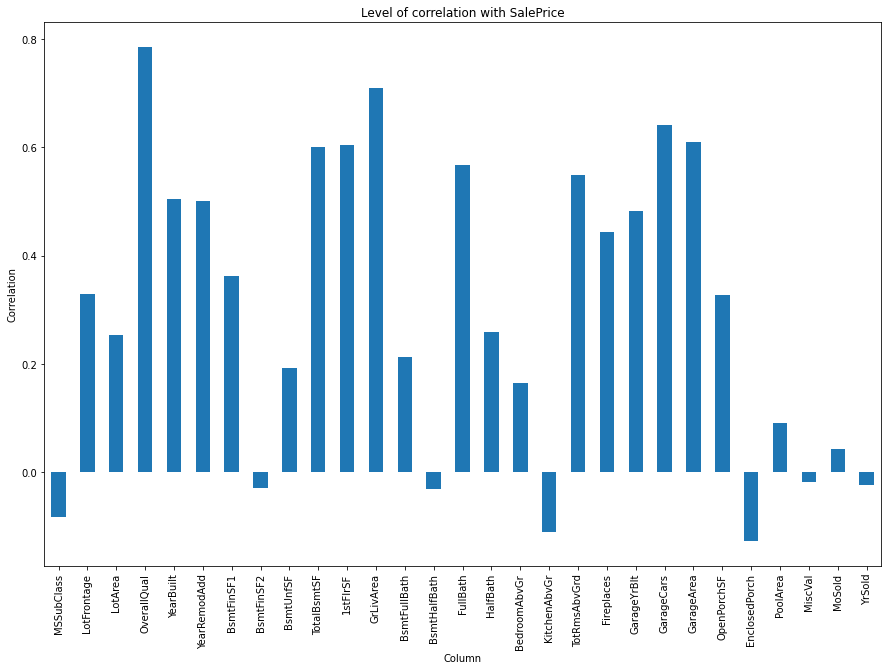

In [20]:
corr_with(numeric_cols, data, 'SalePrice')

### Verifying the correlation with a heatmap

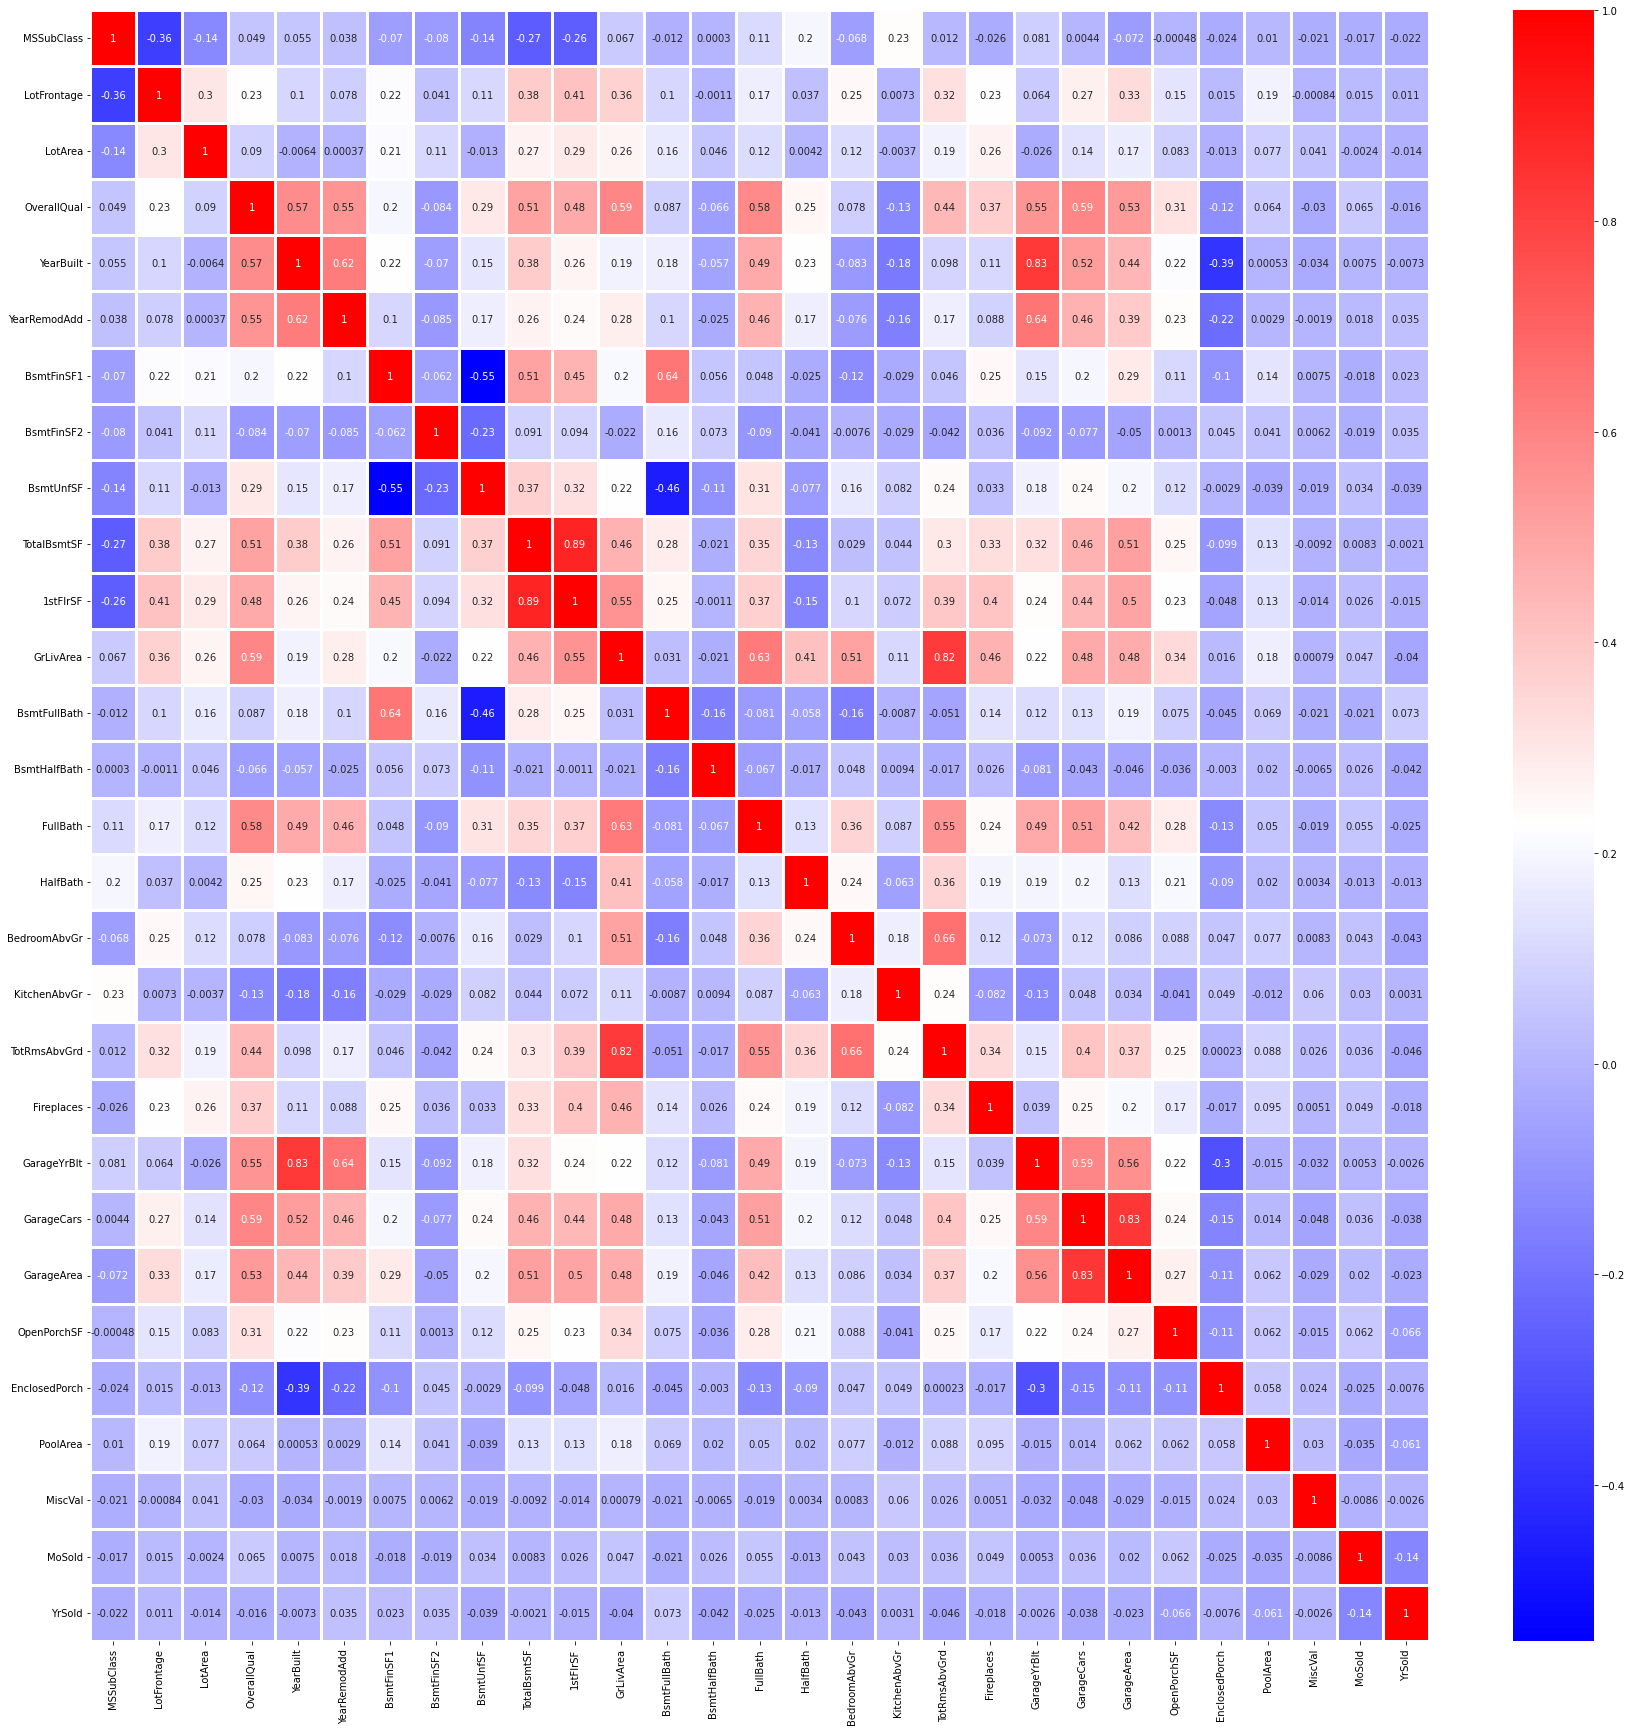

In [21]:
heatmap(numeric_cols)

As you can see, we have some highly correlated variables. Let's remove them.

- 'GrLivArea' has a high correlation (82%) with 'TotRmsAbvGrd'.
- 'OverallQual' has a moderate/high correlation (78%) with 'SalePrice'.
- '1stFlrSF' has a high correlation (88%) with 'TotalBsmtSF'.
- 'GarageCars' has a high correlation (83%) with 'GarageArea'.
- 'GarageYrBlt' has a high correlation (82%) with 'YearBuilt'.

In [22]:
data = data.drop(['GrLivArea','OverallQual','1stFlrSF', 'GarageCars', 'GarageYrBlt'], axis=1)

In [23]:
data.shape

(1348, 53)

## Let's analyze each column and decide whether to use it or not.

### YearBuilt 
- Original construction date

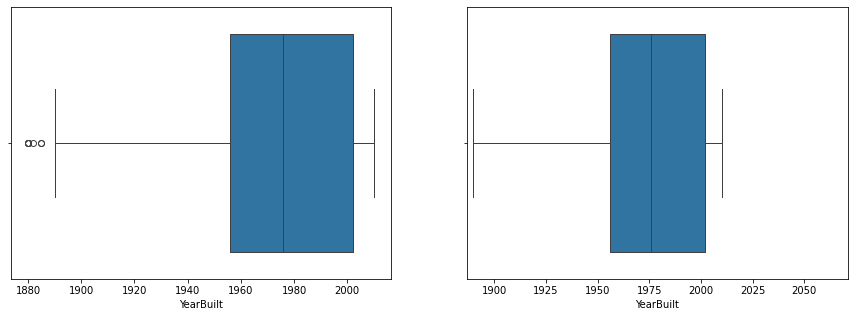

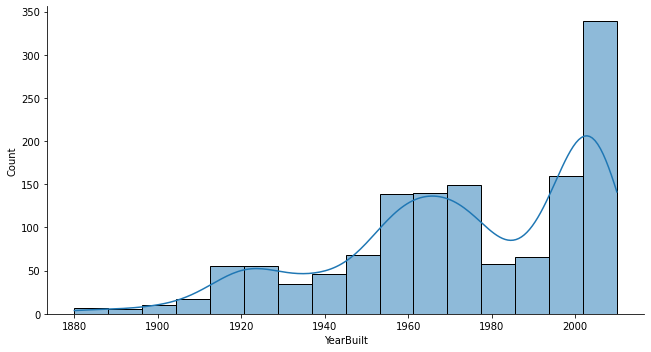

In [24]:
boxplot(data['YearBuilt'])
displot(data['YearBuilt'])

We cannot remove these 'outliers' values, as it identifies the year of construction of each building.

### YearRemodAdd
- Remodel date

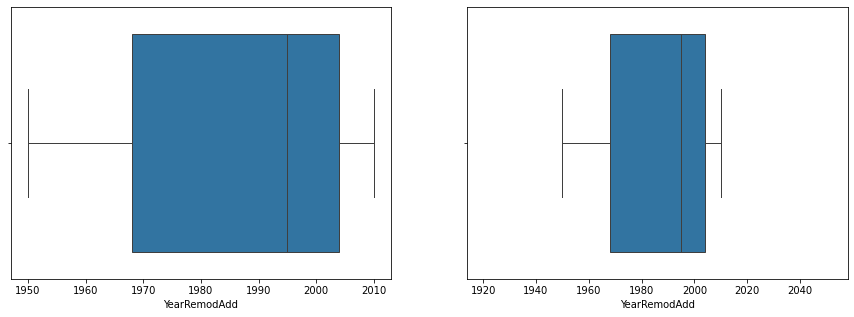

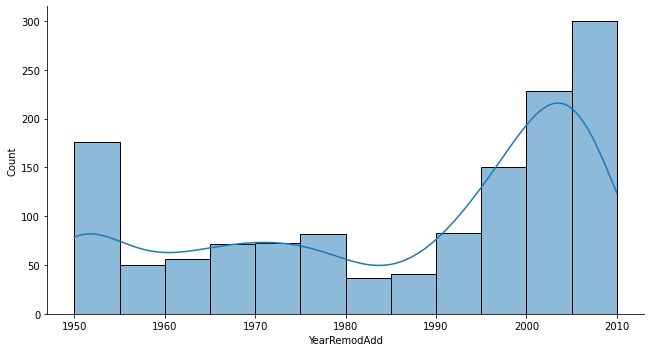

In [25]:
boxplot(data['YearRemodAdd'])
displot(data['YearRemodAdd'])

Checking if the values are the same.

In [26]:
print((data['YearBuilt'] == data['YearRemodAdd']).value_counts())

True     719
False    629
Name: count, dtype: int64


More than half of the 'YearRemodAdd' values ​​are equal to the value of the 'YearBuilt' variable. I think people put the same number here even though the house was never remodded. I'm going to choose to remove that feature and just use 'YearBuilt'.

In [27]:
data = data.drop('YearRemodAdd', axis=1)
data.shape

(1348, 52)

### BsmtFinSF1 
- Type 1 finished square feet

(-1103.25, 1838.75)
There are about 0 outliers below the lower limit.
There are about 6 outliers above the upper limit.
There are about 6 outliers in total.


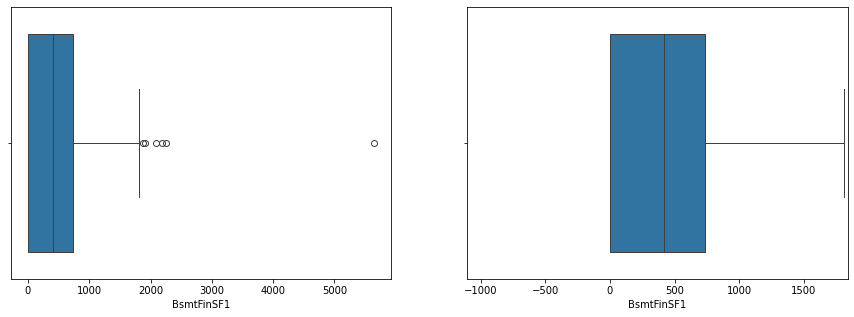

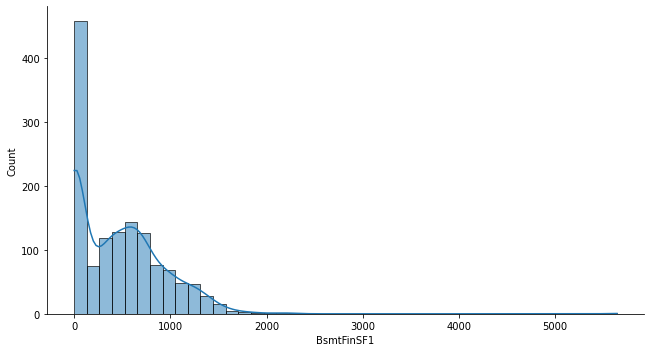

In [28]:
boxplot(data['BsmtFinSF1'])
displot(data['BsmtFinSF1'])
print(limits(data['BsmtFinSF1']))
how_many_outliers(data, 'BsmtFinSF1', -1099, 1833)

Let's remove the outliers of this feature and try using it.

In [29]:
data, outliers_removed = remove_outliers(data, 'BsmtFinSF1')
print(f'{outliers_removed} outliers removed.')

6 outliers removed.


### BsmtFinSF2 
- Type 2 finished square feet

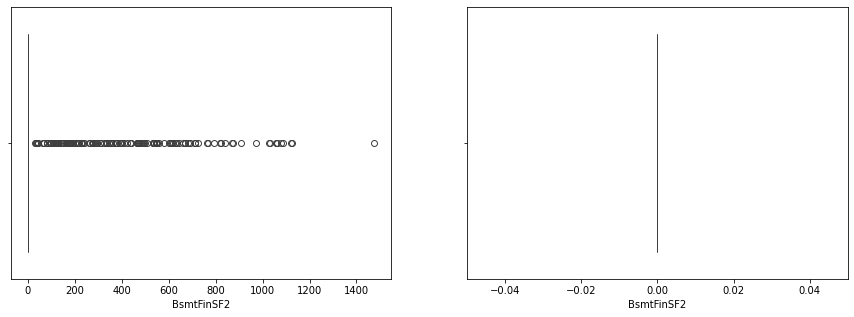

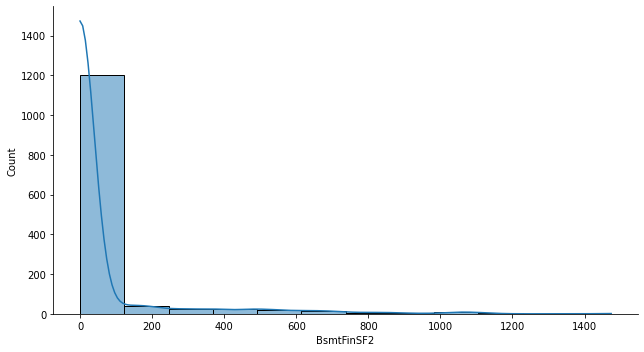

In [30]:
boxplot(data['BsmtFinSF2'])
displot(data['BsmtFinSF2'])

Lots of zeros. They are probably values not filled in and set to 0 by default. I will choose to remove this column.

In [31]:
data = data.drop('BsmtFinSF2', axis = 1)
data.shape

(1342, 51)

### BsmtUnfSF 
- Unfinished square feet of basement area

(-604.0, 1668.0)
There are about 0 outliers below the lower limit.
There are about 29 outliers above the upper limit.
There are about 29 outliers in total.


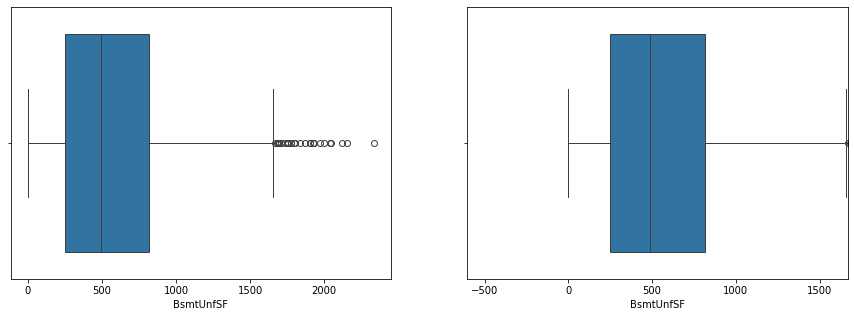

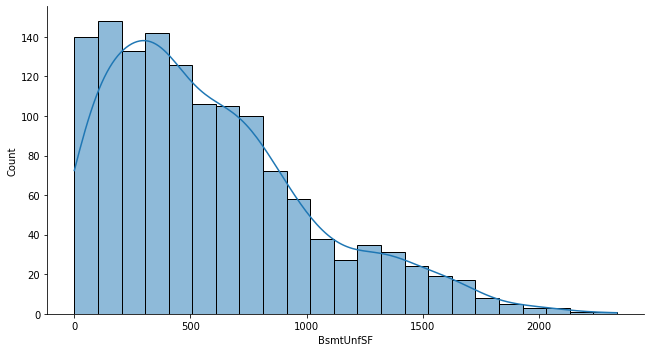

In [32]:
boxplot(data['BsmtUnfSF'])
displot(data['BsmtUnfSF'])
print(limits(data['BsmtUnfSF']))
how_many_outliers(data,'BsmtUnfSF', -604, 1668)

I think this could be a good one. Let's try to use this column. Let's remove the ouliers.

In [33]:
data, outliers_removed = remove_outliers(data, 'BsmtUnfSF')
print(f'{outliers_removed} outliers removed.')

29 outliers removed.


### TotalBsmtSF 
- Total square feet of basement area

(103.5, 2003.5)
There are about 1 outliers below the lower limit.
There are about 18 outliers above the upper limit.
There are about 19 outliers in total.


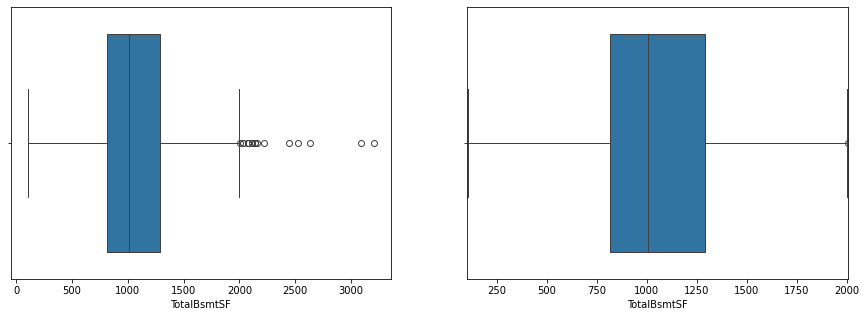

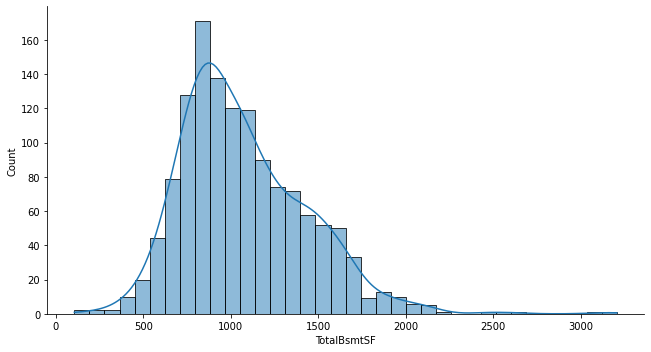

In [34]:
boxplot(data['TotalBsmtSF'])
displot(data['TotalBsmtSF'])
print(limits(data['TotalBsmtSF']))
how_many_outliers(data,'TotalBsmtSF', 108, 1996)

In [35]:
data, outliers_removed = remove_outliers(data, 'TotalBsmtSF')
print(f'{outliers_removed} outliers removed.')

17 outliers removed.


### BsmtFullBath 
- Basement full bathrooms

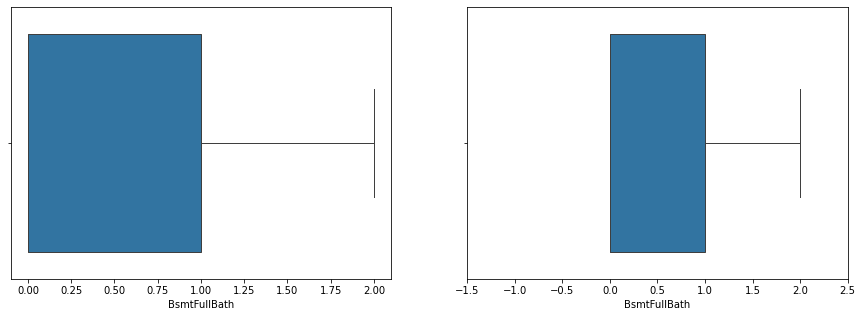

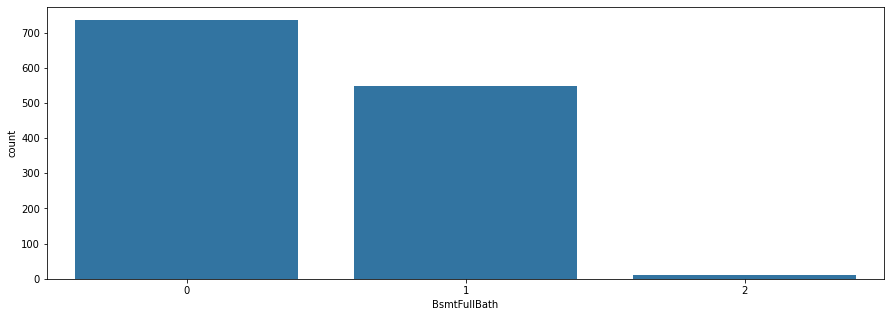

In [36]:
boxplot(data['BsmtFullBath'])
barplot(data['BsmtFullBath'])

### FullBath 
- Full bathrooms above grade

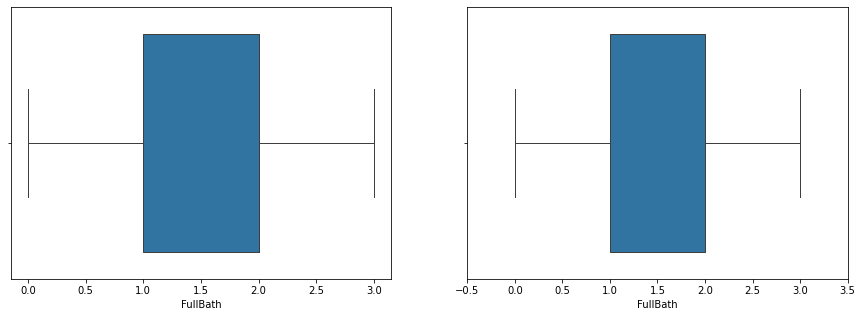

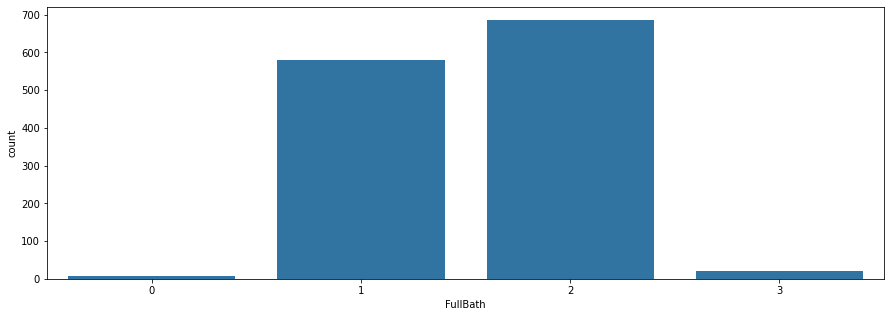

In [37]:
boxplot(data['FullBath'])
barplot(data['FullBath'])

We have two columns ('BsmtFullBath' and 'FullBath') talking about 'Bathrooms', broken down by basement level and above grade. Let's create a new column called 'bathrooms', which counts all the bathrooms in the house, regardless of where the bathroom is located. At the end, let's remove the two columns that we joined.

In [38]:
col1 = data['BsmtFullBath']
col2 = data['FullBath']

data['Bathrooms'] = col1 + col2

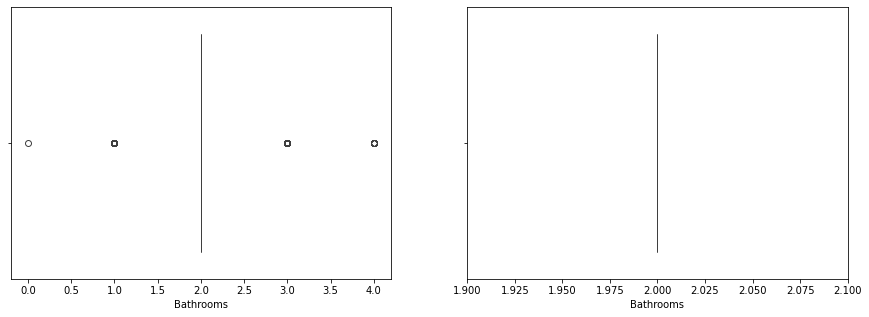

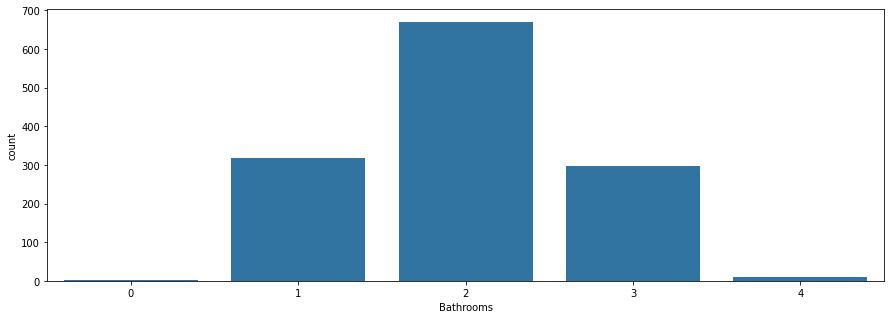

In [39]:
boxplot(data['Bathrooms'])
barplot(data['Bathrooms'])

In [40]:
limits(data['Bathrooms'])

(2.0, 2.0)

In [41]:
data = data.drop(['BsmtFullBath','FullBath'], axis=1)
data.shape

(1296, 50)

### BsmtHalfBath 
- Basement half bathrooms

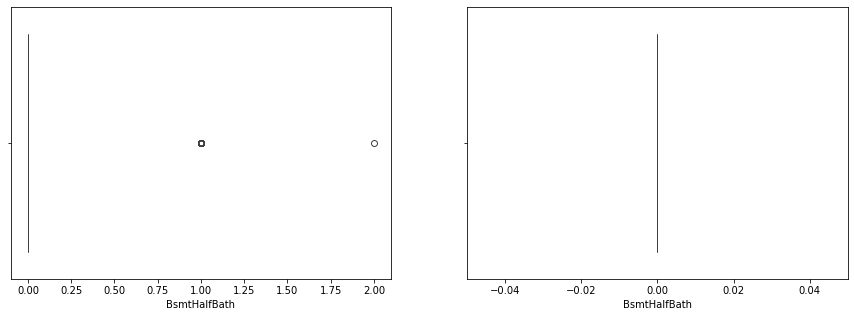

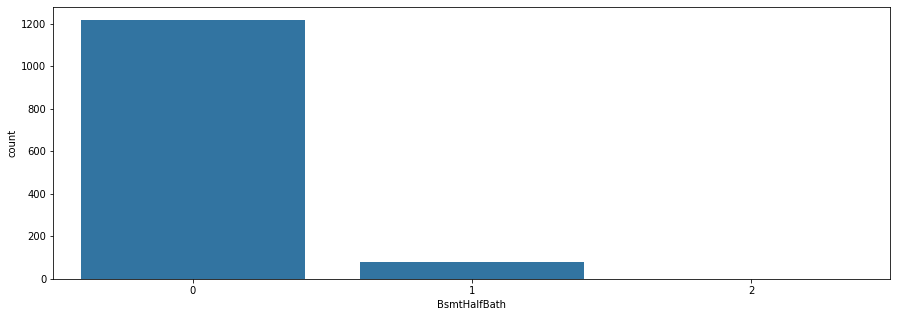

In [42]:
boxplot(data['BsmtHalfBath'])
barplot(data['BsmtHalfBath'])

### HalfBath 
- Half baths above grade

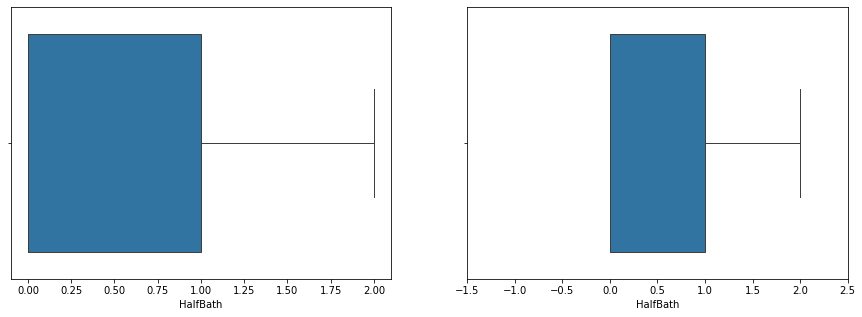

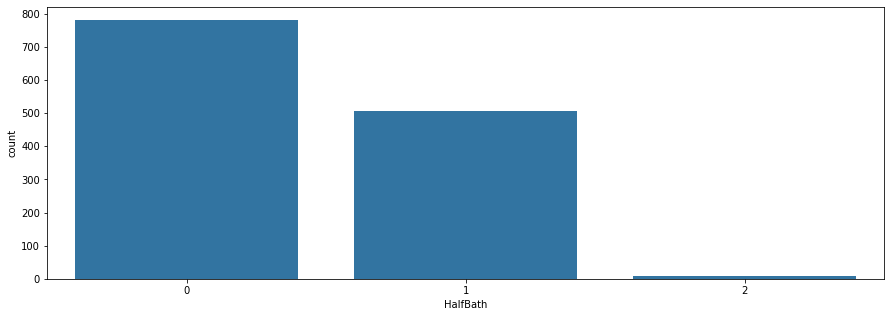

In [43]:
boxplot(data['HalfBath'])
barplot(data['HalfBath'])

Here we have the same “problem” as in the “bathroom” variable. Let's do it the same way.

In [44]:
col1 = data['BsmtHalfBath']
col2 = data['HalfBath']

data['HalfBaths'] = col1 + col2

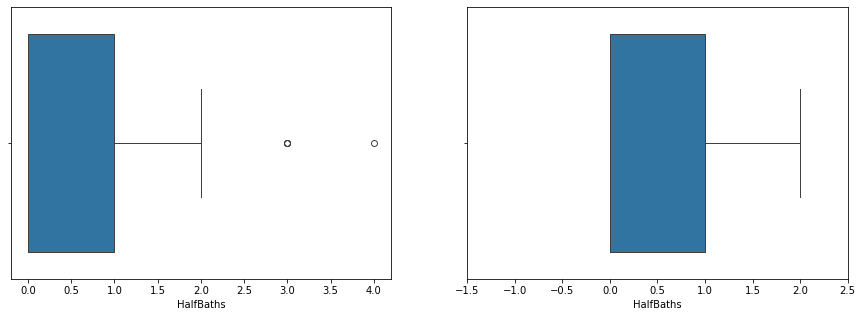

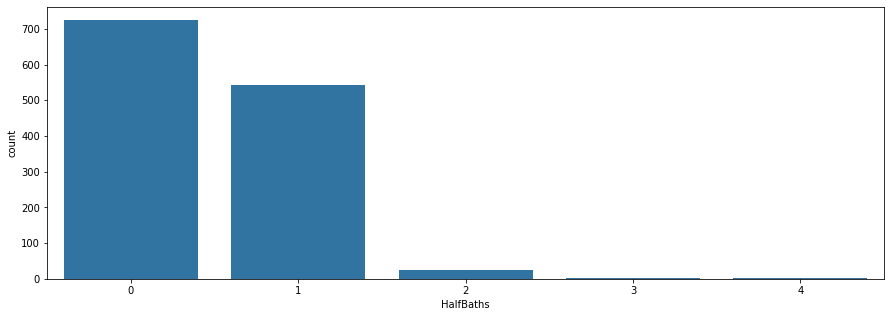

In [45]:
boxplot(data['HalfBaths'])
barplot(data['HalfBaths'])

In [46]:
data = data.drop(['BsmtHalfBath','HalfBath'], axis=1)
data.shape

(1296, 49)

In [47]:
print(limits(data['HalfBaths']))
how_many_outliers(data, 'HalfBaths', -1, 2)

(-1.5, 2.5)
There are about 0 outliers below the lower limit.
There are about 4 outliers above the upper limit.
There are about 4 outliers in total.


We only have 4 homes with bathroom values above the upper band. I will remove these outliers to avoid biasing the model.

In [48]:
data, outliers_removed = remove_outliers(data, 'HalfBaths')
print(f'{outliers_removed} outliers removed.')

4 outliers removed.


### BedroomAbvGr 
- Number of bedrooms above basement level

BedroomAbvGr
3    741
2    308
4    178
1     40
5     16
0      6
6      3
Name: count, dtype: int64
Limits: (0.5, 4.5)
There are about 6 outliers below the lower limit.
There are about 19 outliers above the upper limit.
There are about 25 outliers in total.


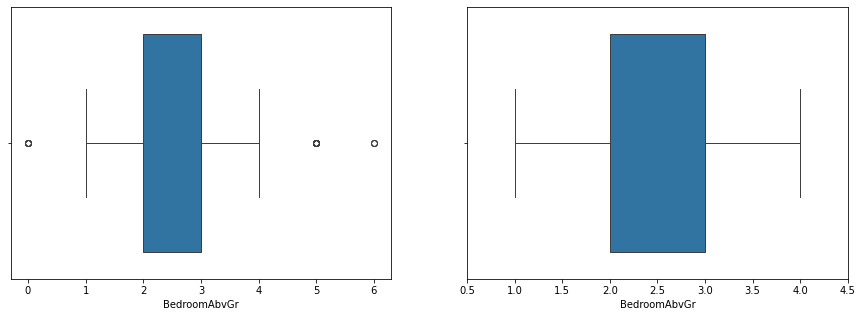

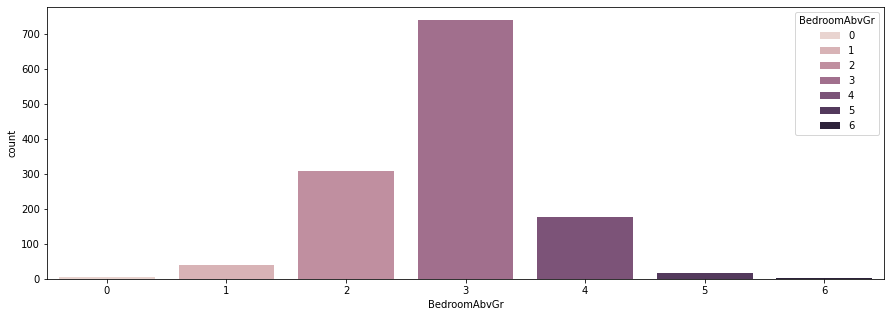

In [49]:
boxplot(data['BedroomAbvGr'])
countplot(data, 'BedroomAbvGr')
print(f"Limits: {limits(data['BedroomAbvGr'])}")
how_many_outliers(data, 'BedroomAbvGr', 1, 4)

I believe this is an important feature. I don't think there are houses in the dataset with 0 beds. A high number of beds is possible, but very unlikely. I will remove the outliers.

In [50]:
data, outliers_removed = remove_outliers(data, 'BedroomAbvGr')
print(f'{outliers_removed} outliers removed.')

25 outliers removed.


### KitchenAbvGr 
- Number of kitchens

KitchenAbvGr
1    1238
2      28
3       1
Name: count, dtype: int64
There are about 0 outliers below the lower limit.
There are about 29 outliers above the upper limit.
There are about 29 outliers in total.


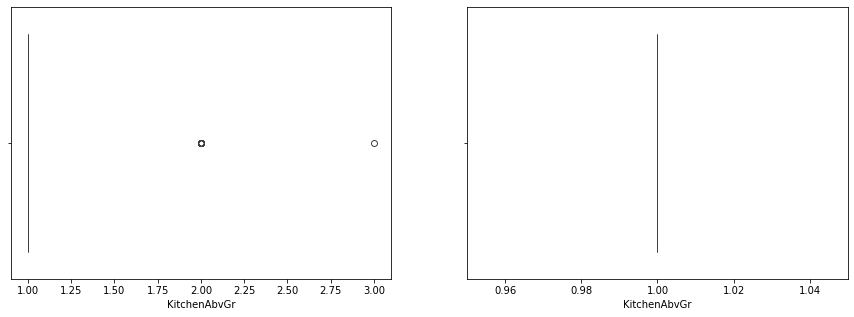

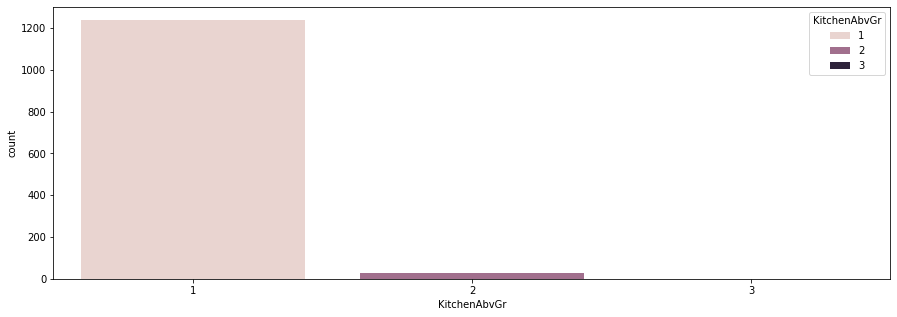

In [51]:
boxplot(data['KitchenAbvGr'])
countplot(data, 'KitchenAbvGr')
data['KitchenAbvGr'].value_counts()
how_many_outliers(data, 'KitchenAbvGr', 1, 1)

Total kitchens. If we remove these outliers, we will also remove houses from the data that have more than one kitchen (considering our 'limit' function). We are not going to remove these outliers and use them in this way.

### TotRmsAbvGrd 
- Total rooms above grade (does not include bathrooms)

TotRmsAbvGrd
6     377
7     294
5     247
8     157
4      78
9      59
10     29
11     12
3      11
12      3
Name: count, dtype: int64
Limits: (2.0, 10.0)
There are about 0 outliers below the lower limit.
There are about 15 outliers above the upper limit.
There are about 15 outliers in total.


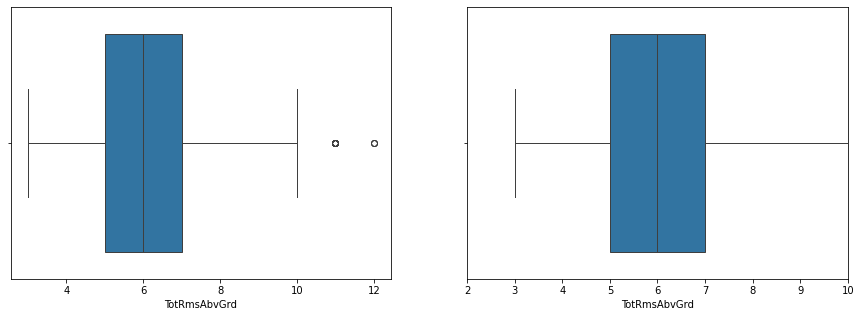

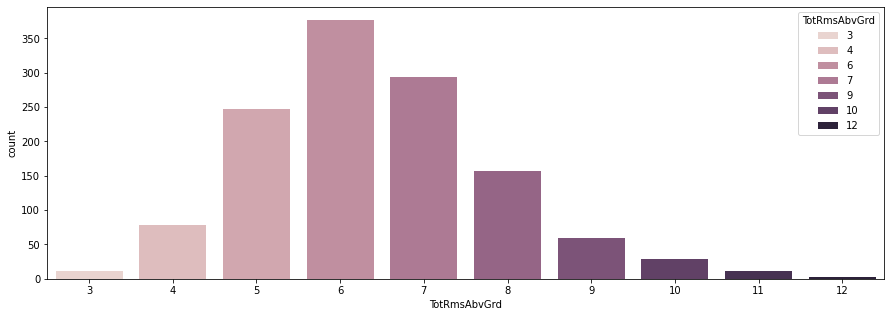

In [52]:
boxplot(data['TotRmsAbvGrd'])
countplot(data,'TotRmsAbvGrd')
print(f"Limits: {limits(data['TotRmsAbvGrd'])}")
how_many_outliers(data, 'TotRmsAbvGrd', 2, 10)

Total number of rooms in the house. There may be houses with "connected" rooms, such as the kitchen and dining room. Let's remove these outliers. Just a few lines.

In [53]:
data, outliers_removed = remove_outliers(data, 'TotRmsAbvGrd')
print(f'{outliers_removed} outliers removed.')

15 outliers removed.


### Fireplaces 
- Number of fireplaces

Fireplaces
1    583
0    572
2     93
3      4
Name: count, dtype: int64
There are about 0 outliers below the lower limit.
There are about 4 outliers above the upper limit.
There are about 4 outliers in total.


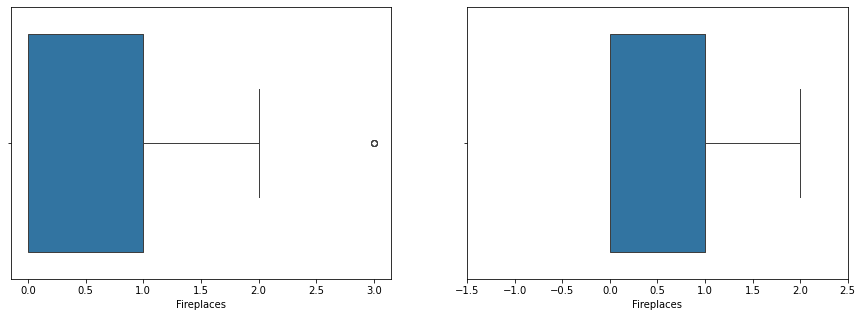

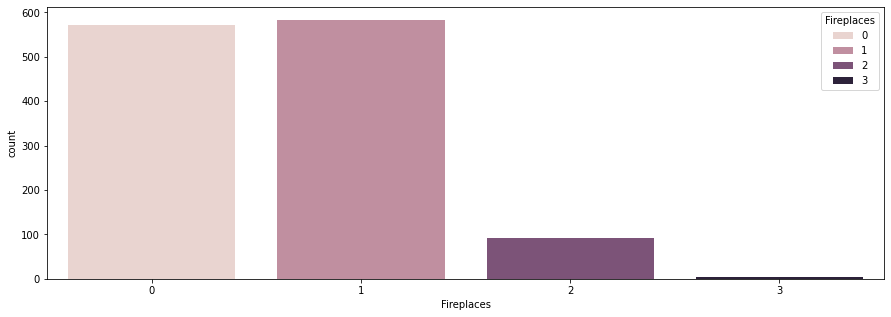

In [54]:
boxplot(data['Fireplaces'])
countplot(data,'Fireplaces')
limits(data['Fireplaces'])
how_many_outliers(data, 'Fireplaces', 0, 2)

Total fireplaces in the house. I think it's a good one, but 3 fireplaces seems too much. I will remove the outliers.

In [55]:
data, outliers_removed = remove_outliers(data, 'Fireplaces')
print(f'{outliers_removed} outliers removed.')

4 outliers removed.


### GarageArea 
- Size of garage in square feet

(36.0, 900.0)
There are about 0 outliers below the lower limit.
There are about 20 outliers above the upper limit.
There are about 20 outliers in total.


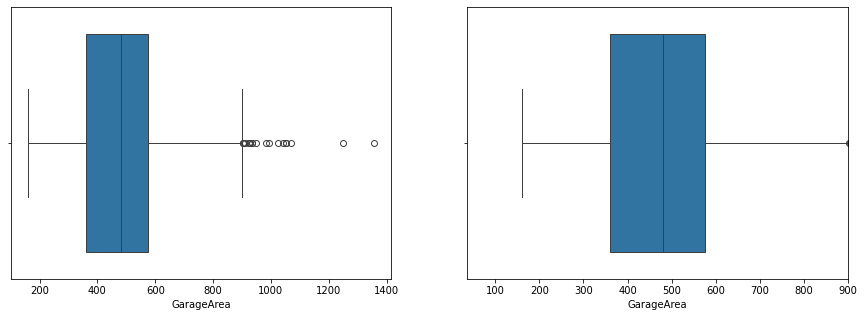

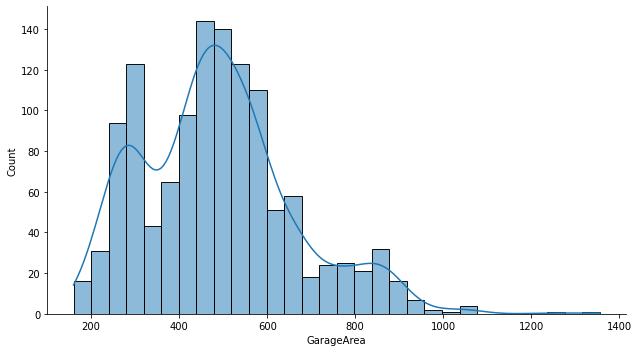

In [56]:
boxplot(data['GarageArea'])
displot(data['GarageArea'])
print(limits(data['GarageArea']))
how_many_outliers(data, 'GarageArea', 36, 900)

The size of the garage can vary greatly. I don't think it has some "impossible" value in the data. I will keep these values that way.

### OpenPorchSF 
- Open porch area in square feet

(-99.0, 165.0)
There are about 0 outliers below the lower limit.
There are about 65 outliers above the upper limit.
There are about 65 outliers in total.


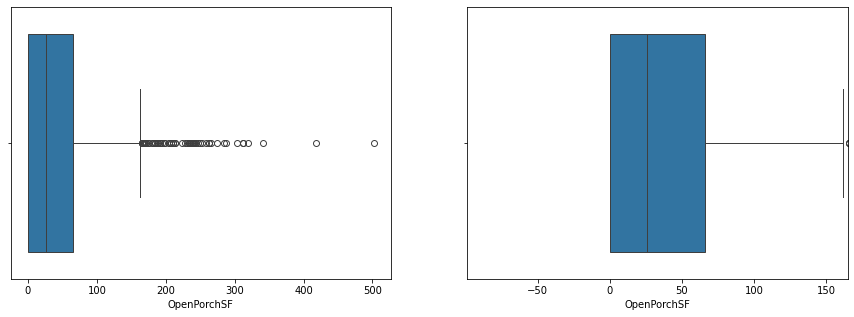

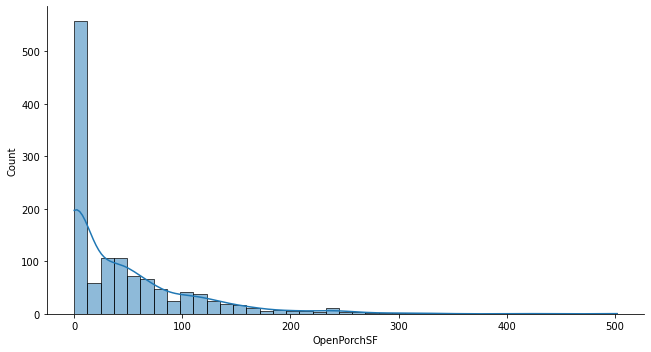

In [57]:
boxplot(data['OpenPorchSF'])
displot(data['OpenPorchSF'])
print(limits(data['OpenPorchSF']))
how_many_outliers(data, 'OpenPorchSF', -99, 165)

Let's try to use this column this way..

### EnclosedPorch 
- Enclosed porch area in square feet

EnclosedPorch
True     1069
False     179
Name: count, dtype: int64


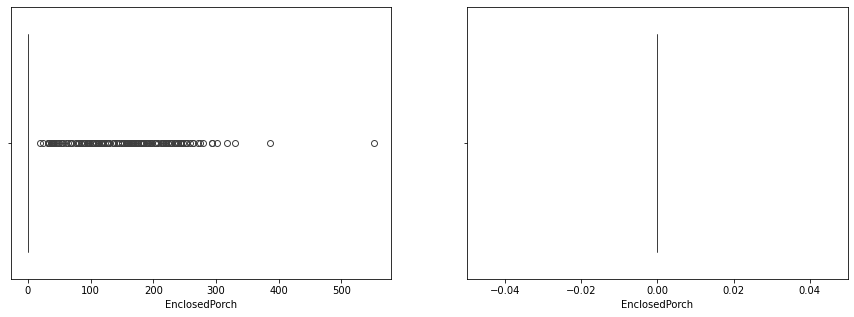

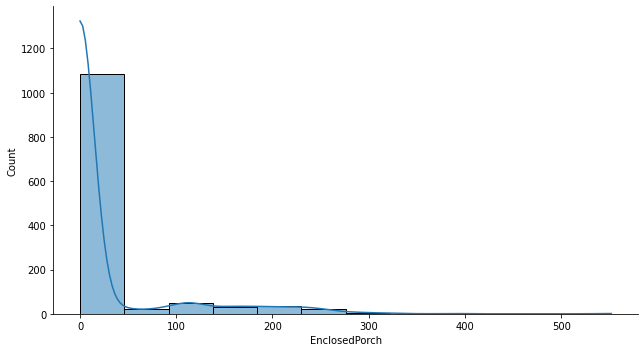

In [58]:
boxplot(data['EnclosedPorch'])
displot(data['EnclosedPorch'])
print((data['EnclosedPorch'] == 0).value_counts())

I believe that if you have an 'Open porch area' you will not have an 'Enclosed porch area' and vice versa. Or you can have both. For this moment I will keep it that way too, despite the vast majority of values being equal to zero.

### PoolArea 
- Pool area in square feet

PoolArea
0      1244
512       1
648       1
576       1
738       1
Name: count, dtype: int64


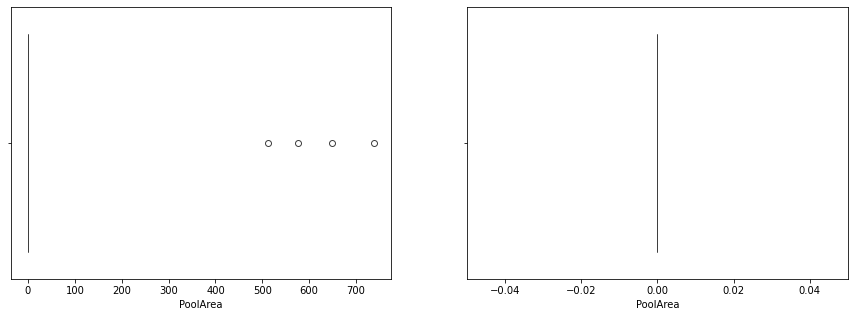

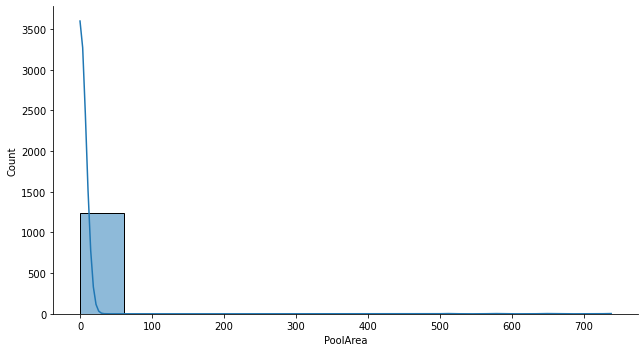

In [59]:
boxplot(data['PoolArea'])
displot(data['PoolArea'])
print(data['PoolArea'].value_counts())

Two scenarios: 1) None of the houses have a pool (actually, only 4). 2) Bad data filling. To be sure, I'd rather remove that as well.

In [60]:
data = data.drop('PoolArea', axis=1)
data.shape

(1248, 48)

### MiscVal 
- Value of miscellaneous feature

MiscVal
0        1205
400        10
500         7
700         5
600         3
2000        3
450         3
480         2
15500       1
800         1
350         1
1300        1
1200        1
54          1
620         1
560         1
1400        1
2500        1
Name: count, dtype: int64


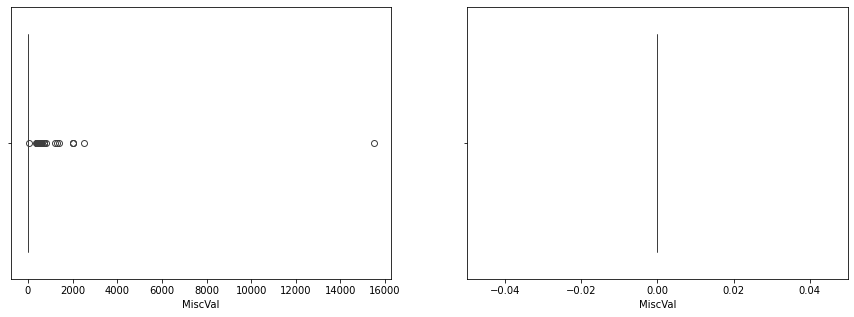

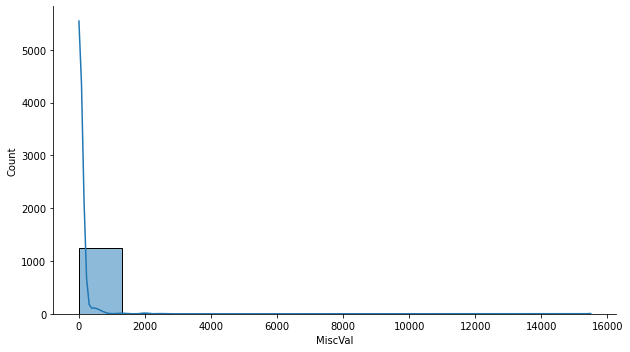

In [61]:
boxplot(data['MiscVal'])
displot(data['MiscVal'])
print(data['MiscVal'].value_counts())

I don't think it's a good feature. Let's drop it.

In [62]:
data.drop('MiscVal', axis=1, inplace=True)
data.shape

(1248, 47)

### MoSold 
- Month Sold

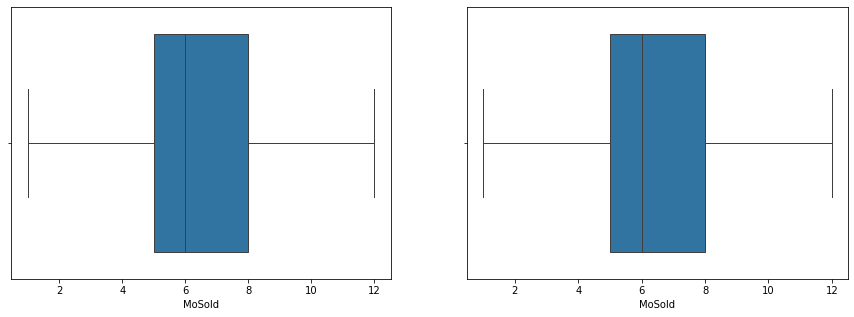

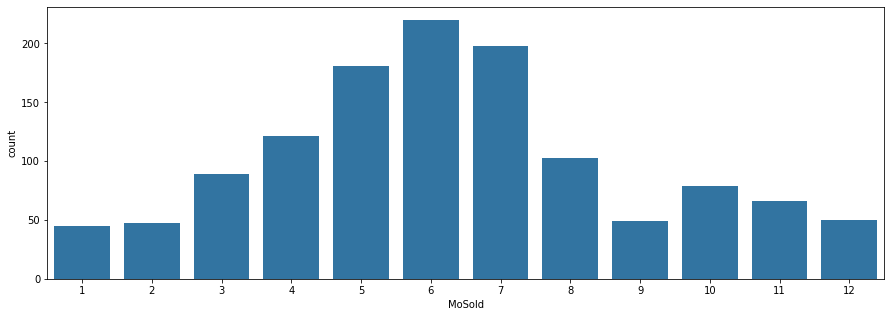

In [63]:
boxplot(data['MoSold'])
barplot(data['MoSold'])

### YrSold 
- Year Sold

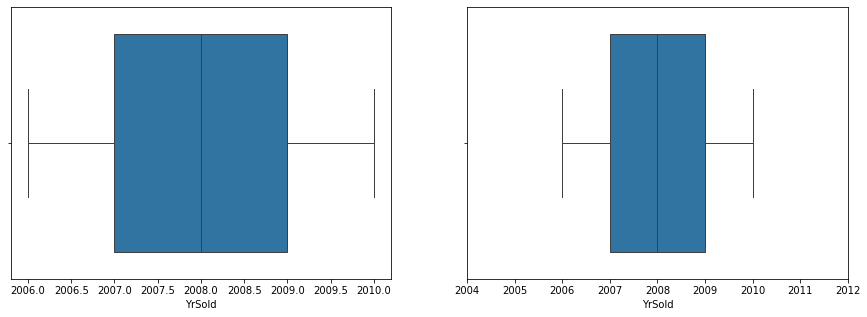

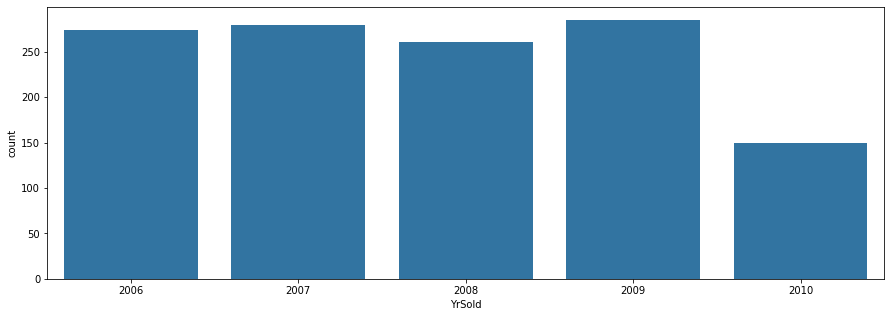

In [64]:
boxplot(data['YrSold'])
barplot(data['YrSold'])

Month and year sold. Nothing to do here.

### SalePrice 
- The property's sale price in dollars. This is the target variable that we're trying to predict.

(18500.0, 326500.0)
There are about 0 outliers below the lower limit.
There are about 47 outliers above the upper limit.
There are about 47 outliers in total.


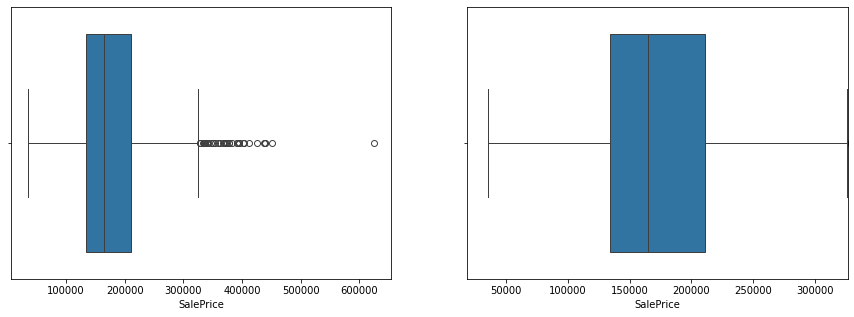

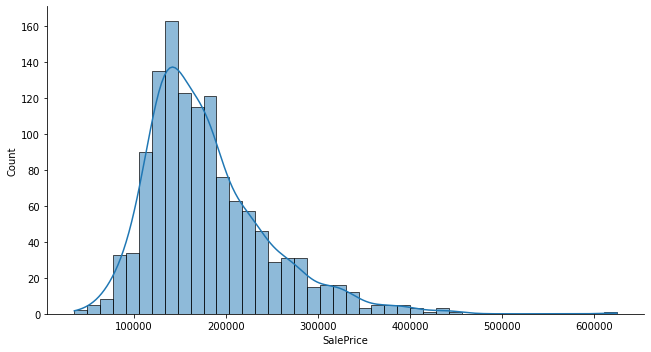

In [65]:
boxplot(data['SalePrice'])
displot(data['SalePrice'])
print(limits(data['SalePrice']))
how_many_outliers(data, 'SalePrice', 19625, 324625)

There are only about 47 outliers above the upper bound. Let's remove it.

In [66]:
data, outliers_removed = remove_outliers(data, 'SalePrice')
print(f'{outliers_removed} outliers removed.')

41 outliers removed.


### LotFrontage 
- Linear feet of street connected to property

(33.0, 105.0)
There are about 47 outliers below the lower limit.
There are about 53 outliers above the upper limit.
There are about 100 outliers in total.


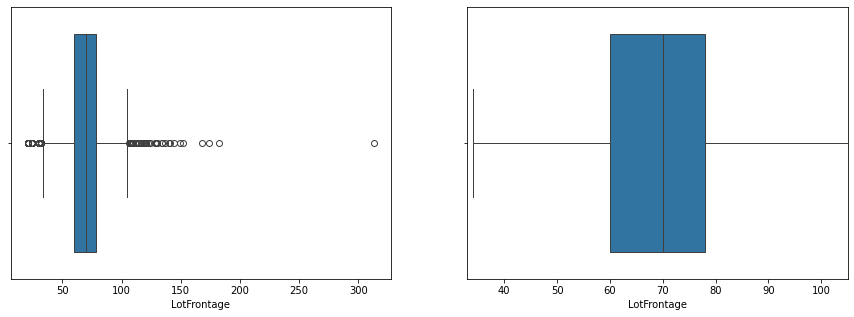

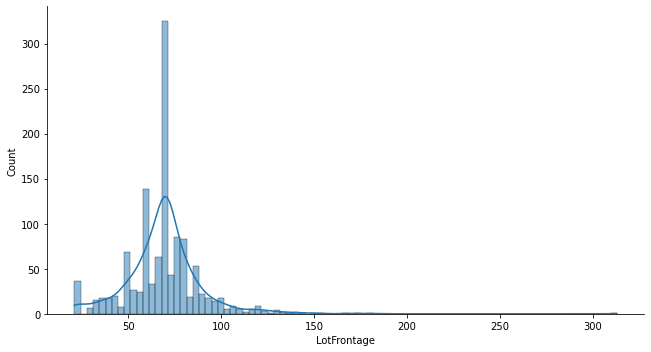

In [67]:
boxplot(data['LotFrontage'])
displot(data['LotFrontage'])
print(limits(data['LotFrontage']))
how_many_outliers(data, 'LotFrontage', 34, 102)

Although it varies a lot, in this case we will only remove the outliers above the upper band, as they are values much more unlikely to occur than those in the lower band. You can keep them if you prefer.

In [68]:
data, outliers_removed = remove_upper_band_outliers(data, 'LotArea')
print(f'{outliers_removed} outliers removed.')

58 outliers removed.


### LotArea  
- Lot size in square feet

(2155.0, 16115.0)
Min value: 1300
Max value: 16770
There are about 21 outliers below the lower limit.
There are about 15 outliers above the upper limit.
There are about 36 outliers in total.


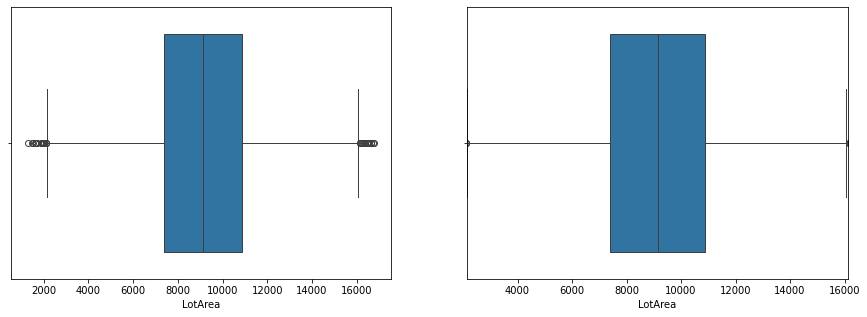

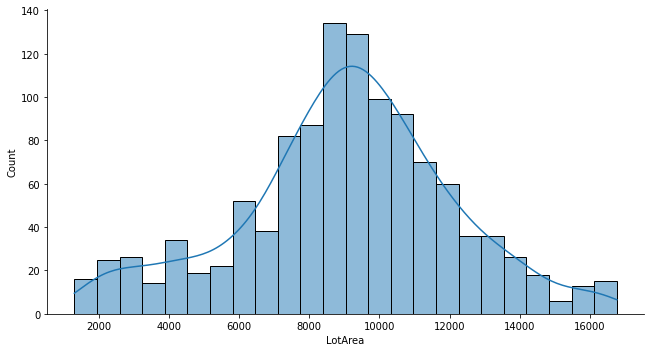

In [69]:
boxplot(data['LotArea'])
displot(data['LotArea'])
print(limits(data['LotArea']))

print(f"Min value: {min(data['LotArea'])}")
print(f"Max value: {max(data['LotArea'])}")

how_many_outliers(data, 'LotArea', 2089, 16105)

The maximum and minimum values do not differ that much (as a very unrealistic and improbable value) from the upper and lower bands of the outliers. For now I will keep it that way.

### MSSubClass 
- The building class

MSSubClass
20     426
60     238
50     119
120     81
160     60
80      50
70      49
30      49
85      19
90      17
190     16
45       9
75       7
180      6
40       3
Name: count, dtype: int64


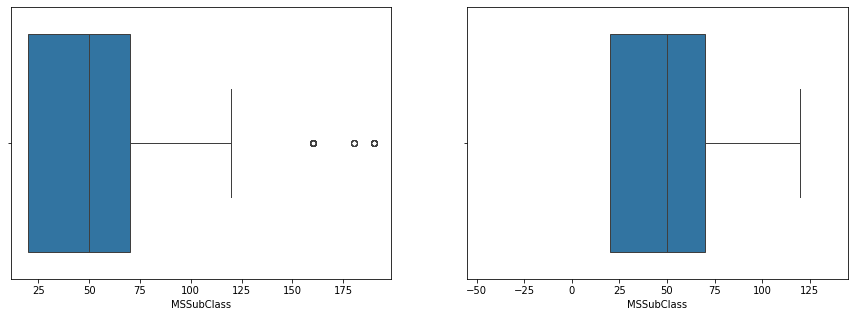

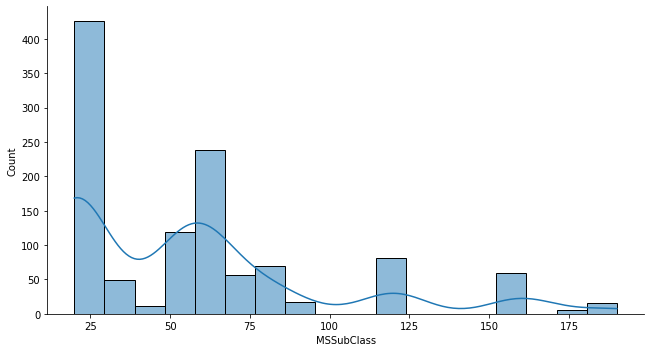

In [70]:
boxplot(data['MSSubClass'])
displot(data['MSSubClass'])
print(data['MSSubClass'].value_counts())

We cannot remove these 'outliers' values, because it identifies the type of dwelling involved in the sale. Let's separate them into 3 categories and drop the old column.

In [71]:
one_story = [20, 30, 40, 45, 50, 120, 150]
two_story = [60, 70, 75, 160]

def categorize_mssubclass(value):
    if value in one_story:
        return 'one_story'
    elif value in two_story:
        return 'two_story'
    else:
        return 'others'

# Apply the function to create a new column 'Category'
data['Category'] = data['MSSubClass'].apply(categorize_mssubclass)

Category
one_story    687
two_story    354
others       108
Name: count, dtype: int64


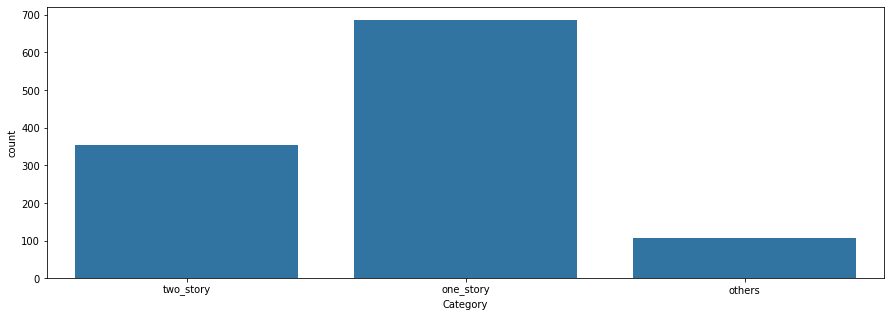

In [72]:
print(data['Category'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='Category', data=data)

In [73]:
data = data.drop('MSSubClass', axis=1)
data.shape

(1149, 47)

### MSZoning 
- The general zoning classification

MSZoning
RL         893
RM         178
FV          60
RH          11
C (all)      7
Name: count, dtype: int64


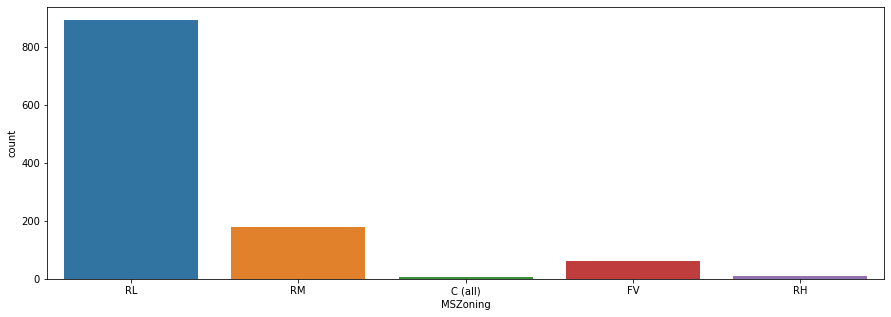

In [74]:
countplot(data,'MSZoning')

Similar to the problem above. Let's merge some data.

In [75]:
agriculture = ['A']
commercial = ['C']
residential = ['FV', 'RH', 'RL', 'RP', 'RM']
industrial = ['I']

def categorize_mszoning(value):
    if value in agriculture:
        return 'agriculture'
    elif value in commercial:
        return 'commercial'
    elif value in residential:
        return 'residential'
    else:
        return 'industrial'

# Apply the function to create a new column 'MS_Zoning'
data['MS_Zoning'] = data['MSZoning'].apply(categorize_mszoning)

MS_Zoning
residential    1142
industrial        7
Name: count, dtype: int64


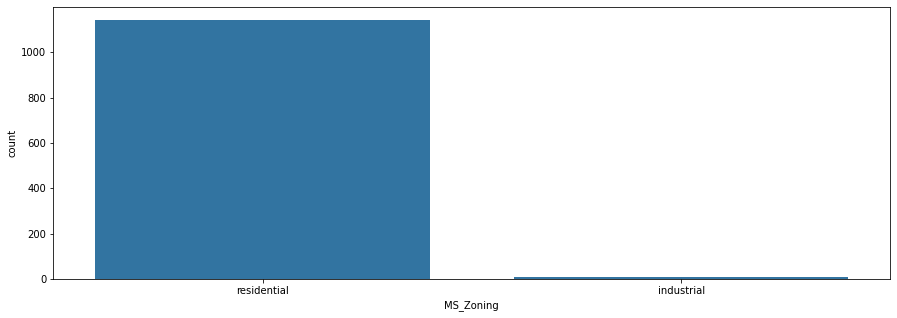

In [76]:
print(data['MS_Zoning'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='MS_Zoning', data=data)

In [77]:
data = data.drop('MSZoning', axis=1)
data.shape

(1149, 47)

### Street 
- Type of road access

Street
Pave    1147
Grvl       2
Name: count, dtype: int64


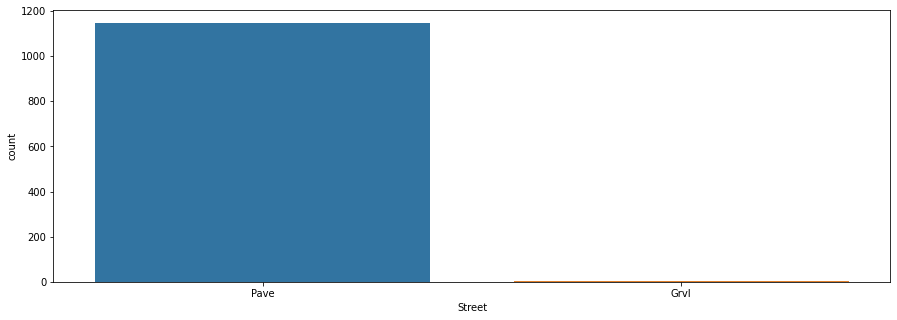

In [78]:
countplot(data,'Street')

Almost all values ​​are the same and I don't think it's a good column. I will drop it.

In [79]:
data = data.drop('Street', axis=1)
data.shape

(1149, 46)

### LotShape 
- General shape of property

LotShape
Reg    742
IR1    378
IR2     24
IR3      5
Name: count, dtype: int64


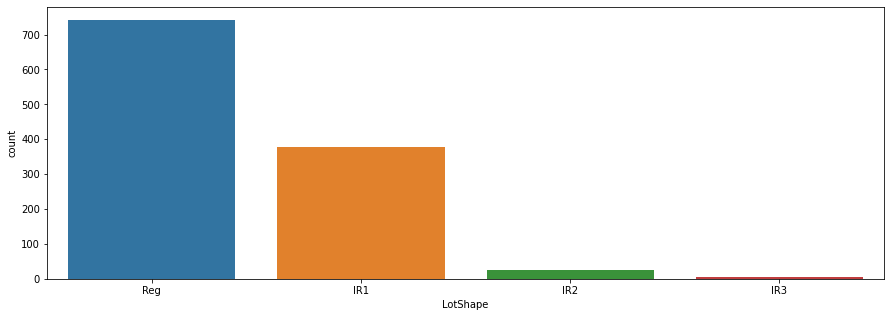

In [80]:
countplot(data,'LotShape')

Slightly irregular(IR1), Moderately irregular(IR2) or irregular(IR3) is very subjective. Let's break it down into two categories: regular or irregular.

In [81]:
regular = ['Reg']

def categorize_lotshape(value):
    if value in regular:
        return 'regular'
    else:
        return 'irregular'

# Apply the function to create a new column 'Lot_shape'
data['Lot_shape'] = data['LotShape'].apply(categorize_lotshape)

Lot_shape
regular      742
irregular    407
Name: count, dtype: int64


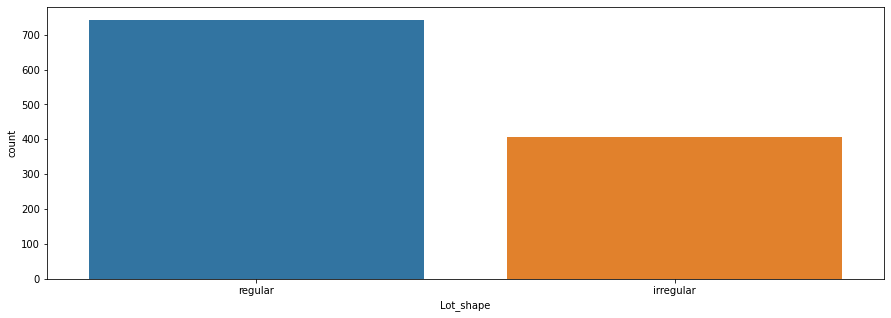

In [82]:
countplot(data,'Lot_shape')

In [83]:
data = data.drop('LotShape', axis=1)
data.shape

(1149, 46)

### Utilities 
- Type of utilities available

Utilities
AllPub    1148
NoSeWa       1
Name: count, dtype: int64


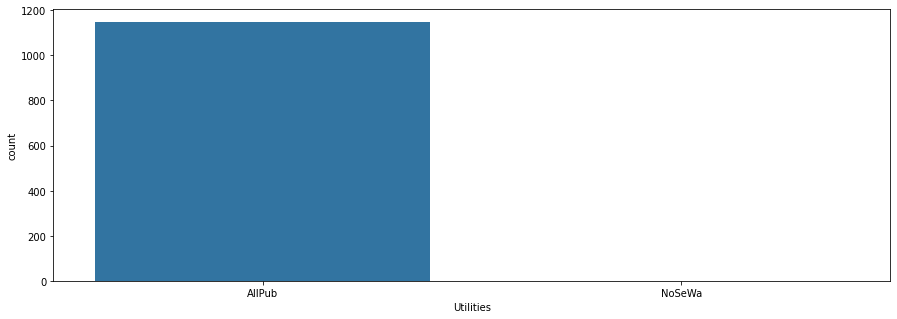

In [84]:
countplot(data,'Utilities')

Almost no values other than 'AllPub' (just one in fact)

In [85]:
data.drop('Utilities', axis=1, inplace=True)
data.shape

(1149, 45)

### LotConfig 
- Lot configuration

LotConfig
Inside     837
Corner     208
CulDSac     62
FR2         38
FR3          4
Name: count, dtype: int64


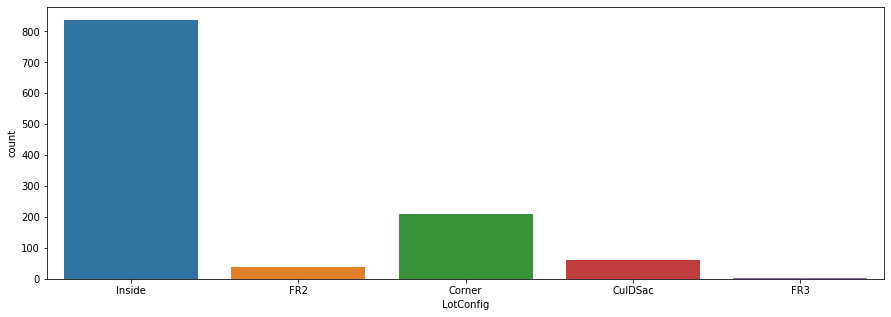

In [86]:
countplot(data,'LotConfig')

Lot specific characteristics. Let's keep it that way.

### Neighborhood 
- Physical locations within Ames city limits

Neighborhood
NAmes      189
CollgCr    140
OldTown     89
Somerst     77
Gilbert     68
Edwards     64
NWAmes      62
Sawyer      62
SawyerW     52
BrkSide     45
NridgHt     42
Crawfor     42
Mitchel     34
IDOTRR      28
Timber      28
NoRidge     24
SWISU       18
Blmngtn     16
BrDale      15
StoneBr     14
MeadowV     11
Veenker      9
ClearCr      9
NPkVill      9
Blueste      2
Name: count, dtype: int64


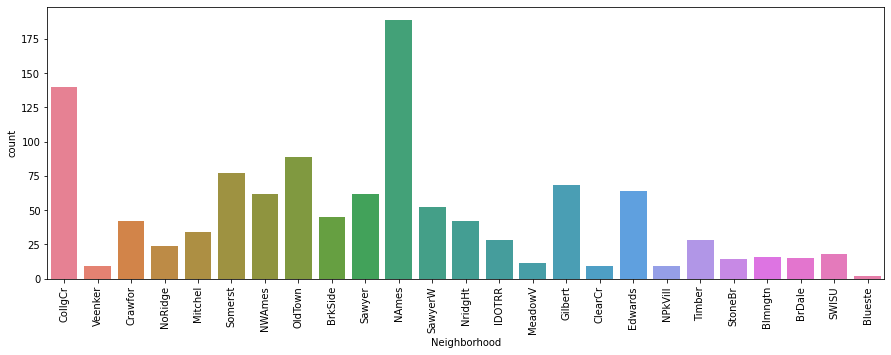

In [87]:
countplot(data,'Neighborhood', x_label_orient=True)

Neighborhood can play a key role in home values. Let's keep this column that way.

**Quick Challenge**: You can also try to reorganize the neighborhood into city zones. Try this and test the model again to see the results. Here's a suggestion, but you can do it however you prefer.

![title](img/ames_map.png)

- Blmngtn	Bloomington Heights - NW
- Blueste	Bluestem - SW
- BrDale	Briardale - NW
- BrkSide	Brookside - NW
- ClearCr	Clear Creek - NW
- CollgCr	College Creek - SW
- Crawfor	Crawford - SW
- Edwards	Edwards - SW
- Gilbert	Gilbert - NW
- IDOTRR	Iowa DOT and Rail Road - SE
- MeadowV	Meadow Village - SE
- Mitchel	Mitchell - SE
- Names	North Ames - NW
- NoRidge	Northridge - NW
- NPkVill	Northpark Villa - NW
- NridgHt	Northridge Heights - NW
- NWAmes	Northwest Ames - NW
- OldTown	Old Town - NW
- SWISU	South & West of Iowa State University - NW
- Sawyer	Sawyer - NW
- SawyerW	Sawyer West - NW
- Somerst	Somerset - NW
- StoneBr	Stone Brook - NW
- Timber	Timberland - SW
- Veenker	Veenker - NW

### Condition1 
- Proximity to main road or railroad

Condition1
Norm      1004
Feedr       56
Artery      35
RRAn        22
PosN        12
RRAe         9
PosA         5
RRNn         4
RRNe         2
Name: count, dtype: int64


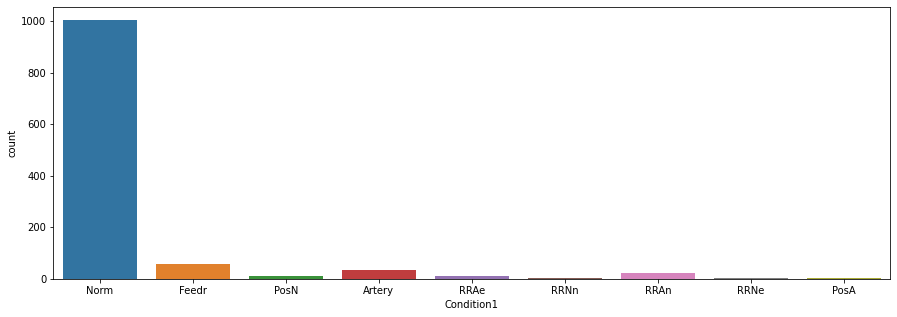

In [88]:
countplot(data,'Condition1')

I don't think it's a good predictor. Also, most values of columns 'Condition1' and 'Condition2' are the same. I will choose to remove both.

In [89]:
print((data['Condition1'] == data['Condition2']).value_counts())

True     1006
False     143
Name: count, dtype: int64


In [90]:
data.drop('Condition1', axis=1, inplace=True)
data.shape

(1149, 44)

### Condition2 
- Proximity to main road or railroad (if a second is present)

Condition2
Norm      1139
Feedr        5
Artery       2
RRNn         2
PosA         1
Name: count, dtype: int64


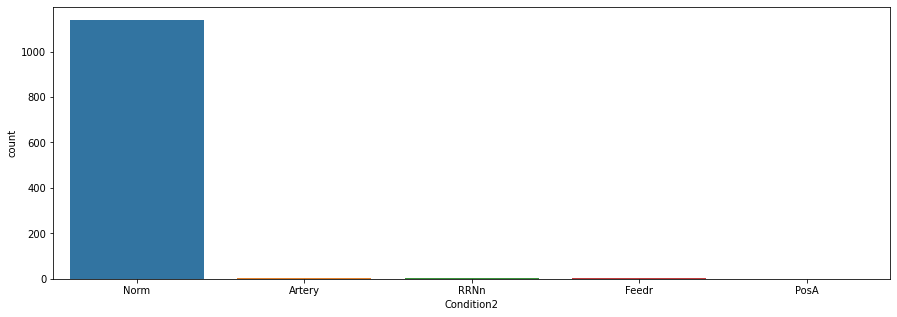

In [91]:
countplot(data,'Condition2')

In [92]:
data.drop('Condition2', axis=1, inplace=True)
data.shape

(1149, 43)

### BldgType 
- Type of dwelling

BldgType
1Fam      971
TwnhsE    106
Twnhs      38
2fmCon     17
Duplex     17
Name: count, dtype: int64


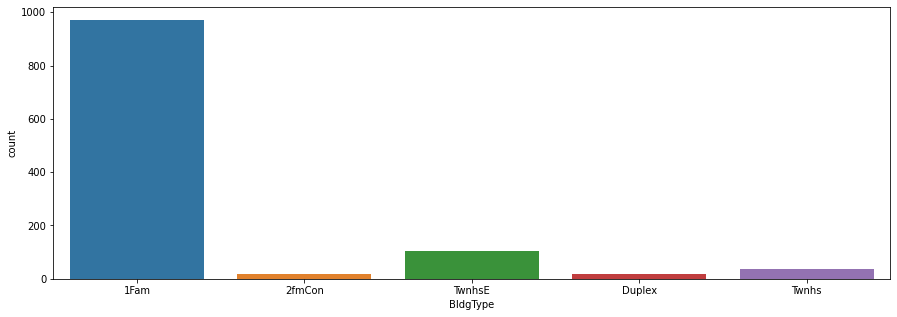

In [93]:
countplot(data,'BldgType')

I will choose to just unify the two categories of "Townhouses"('TwnhsE' and 'Twnhs') into just one called "Townhouse"

In [94]:
twhs = ['TwnhsE', 'Twnhs']
fam1 = ['1Fam']
Duplex = ['Duplex']
fam2 = ['2fmCon']

def categorize_bldgtype(value):
    if value in twhs:
        return 'Townhouse'
    elif value in fam1:
        return '1Fam'
    elif value in Duplex:
        return 'Duplex'
    else:
        return '2fmCon'

# Apply the function to 'BldgType' column
data['BldgType'] = data['BldgType'].apply(categorize_bldgtype)

BldgType
1Fam         971
Townhouse    144
2fmCon        17
Duplex        17
Name: count, dtype: int64


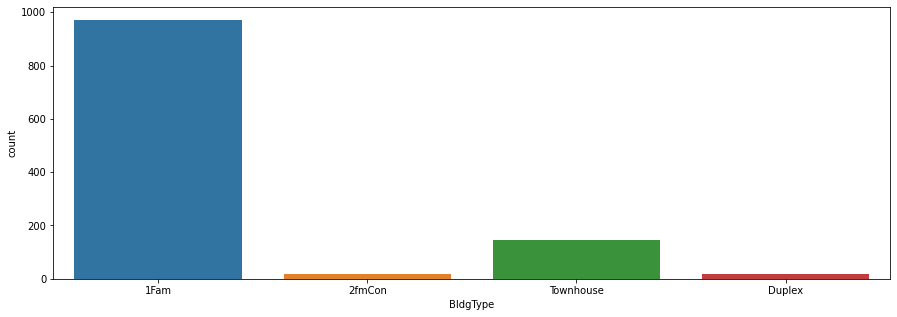

In [95]:
countplot(data,'BldgType')

### HouseStyle 
- Style of dwelling

HouseStyle
1Story    565
2Story    357
1.5Fin    122
SLvl       57
SFoyer     28
1.5Unf     11
2.5Unf      8
2.5Fin      1
Name: count, dtype: int64


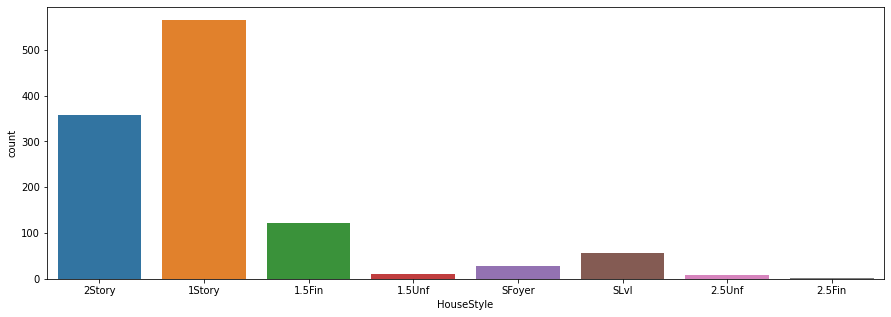

In [96]:
countplot(data,'HouseStyle')

Let's break this down into three main categories: 'one_story', 'two_story' and 'split'.

In [97]:
one_story = ['1Story', '1.5Fin', '1.5Unf']
two_story = ['2Story', '2.5Unf', '2.5Fin']
split = ['SLvl', 'SFoyer']

def categorize_housestyle(value):
    if value in one_story:
        return 'Townhouse'
    elif value in two_story:
        return '1Fam'
    else:
        return '2fmCon'

# Apply the function to 'HouseStyle' column
data['HouseStyle'] = data['HouseStyle'].apply(categorize_housestyle)

HouseStyle
Townhouse    698
1Fam         366
2fmCon        85
Name: count, dtype: int64


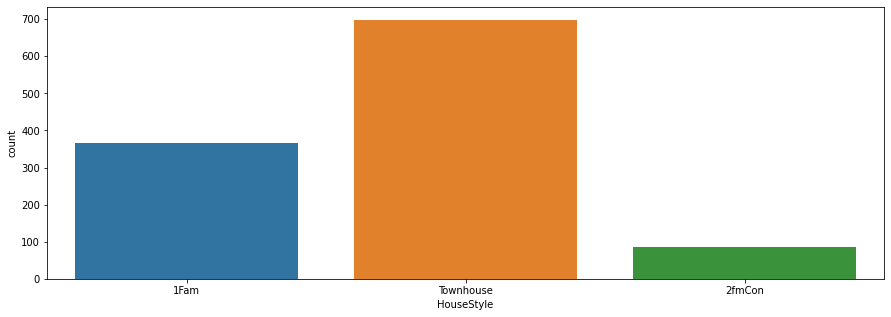

In [98]:
countplot(data,'HouseStyle')

### RoofStyle 
- Type of roof

RoofStyle
Gable      936
Hip        197
Gambrel     10
Mansard      4
Flat         2
Name: count, dtype: int64


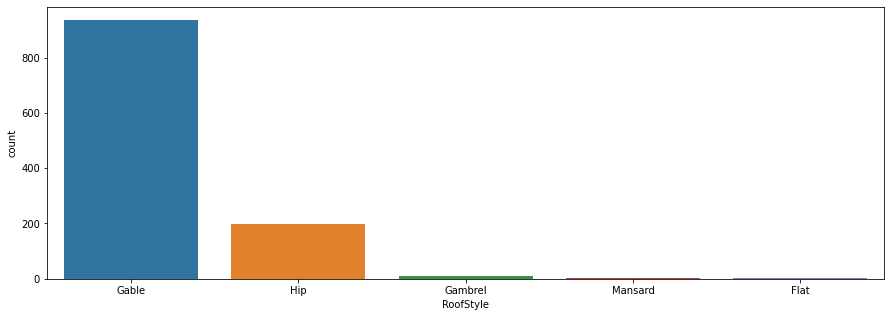

In [99]:
countplot(data,'RoofStyle')

I don't believe that the style of the roof influences the price of the house so much (unless it has leaks haha). I'm going to remove that variable.

In [100]:
data.drop('RoofStyle', axis=1, inplace=True)
data.shape

(1149, 42)

### RoofMatl 
- Roof material

RoofMatl
CompShg    1143
Tar&Grv       2
WdShake       2
WdShngl       1
Roll          1
Name: count, dtype: int64


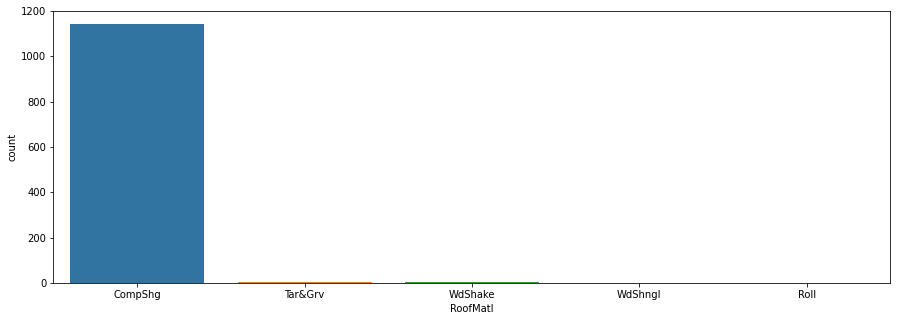

In [101]:
countplot(data,'RoofMatl')

Same as above and most values are the same.

In [102]:
data.drop('RoofMatl', axis=1, inplace=True)
data.shape

(1149, 41)

### Exterior1st 
- Exterior covering on house

Exterior1st
VinylSd    420
HdBoard    190
MetalSd    187
Wd Sdng    149
Plywood     79
CemntBd     37
BrkFace     34
WdShing     18
Stucco      16
AsbShng     14
Stone        2
BrkComm      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


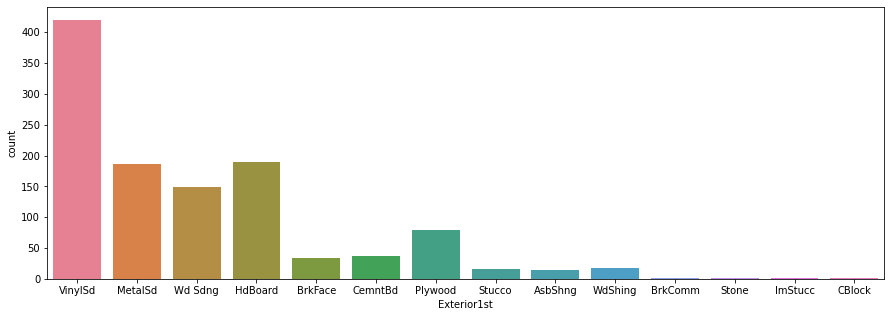

In [103]:
countplot(data,'Exterior1st')

Here we have these types of exterior siding on houses (listed below). I'm going to break it down into three main categories: diverse_siding, wood_style_siding, and rock_style_siding.

Also, in categories 'Exterior1st' and 'Exterior2nd' most of the values are the same. I will remove the second.

Note: I'm not an expert in external house siding. I tried my best to divide these columns into less complex data. I hope you understand.	

* **CODE** - **EXTERIOR TYPE**  - **NEW CLASSIFICATION**
* AsbShng - Asbestos Shingles - "Diverse style"
* AsphShn - Asphalt Shingles - "Rock style"
* BrkComm - Brick Common - "Rock style"
* BrkFace - Brick Face - "Rock style"
* CBlock - Cinder Block - "Rock style"
* CemntBd - Cement Board - "Rock style"
* HdBoard - Hard Board - "Wood style"
* ImStucc - Imitation Stucco - "Rock style"
* MetalSd - Metal Siding - "Diverse style"
* Other - Other - "Diverse style"
* Plywood - Plywood - "Wood style"
* PreCast - PreCast	 - "Rock style"
* Stone - Stone - "Rock style"
* Stucco - Stucco - "Rock style"
* VinylSd - Vinyl Siding - "Diverse style"
* Wd Sdng - Wood Siding - "Wood style"
* WdShing - Wood Shingles - "Wood style"

In [104]:
print((data['Exterior1st'] == data['Exterior2nd']).value_counts())

True     1003
False     146
Name: count, dtype: int64


In [105]:
wood_style_siding = ['Wd Sdng', 'WdShing', 'Plywood', 'HdBoard']
rock_style_siding = ['Stone', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'PreCast', 'Stucco', 'ImStucc']
diverse_siding = ['AsbShng', 'MetalSd', 'Other', 'VinylSd']

def categorize_exterior1st(value):
    if value in wood_style_siding:
        return 'wood_style_siding'
    elif value in rock_style_siding:
        return 'rock_style_siding'
    else:
        return 'diverse_siding'

# Apply the function to 'Exterior1st' column
data['Exterior1st'] = data['Exterior1st'].apply(categorize_exterior1st)

Exterior1st
diverse_siding       621
wood_style_siding    436
rock_style_siding     92
Name: count, dtype: int64


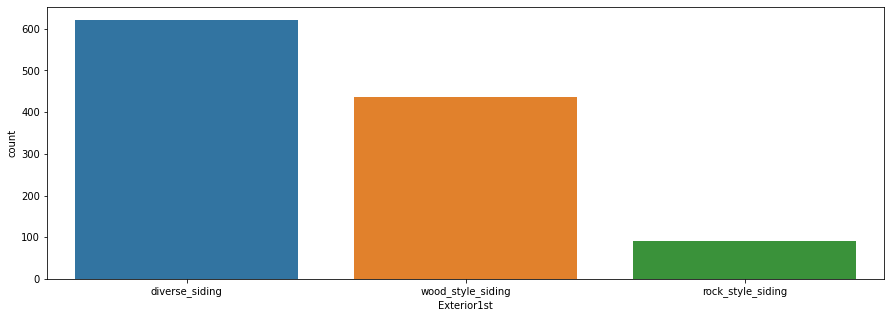

In [106]:
countplot(data,'Exterior1st')

### Exterior2nd 
- Exterior covering on house (if more than one material)

Exterior2nd
VinylSd    411
MetalSd    183
HdBoard    177
Wd Sdng    147
Plywood    100
CmentBd     36
Wd Shng     28
Stucco      18
BrkFace     17
AsbShng     14
ImStucc      7
Brk Cmn      6
Stone        2
AsphShn      1
Other        1
CBlock       1
Name: count, dtype: int64


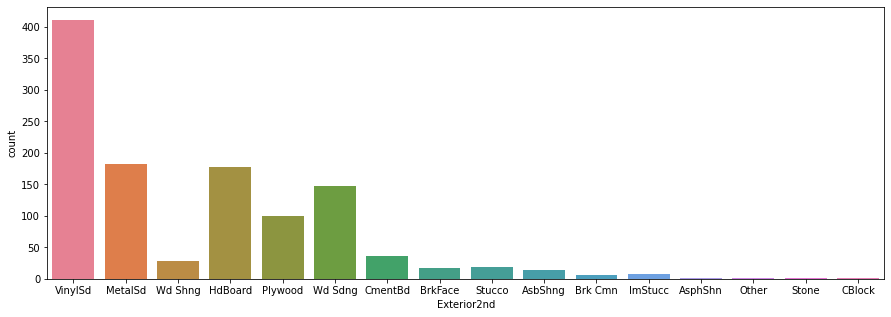

In [107]:
countplot(data,'Exterior2nd')

In [108]:
data = data.drop('Exterior2nd', axis=1)
data.shape

(1149, 40)

### ExterQual 
- Exterior material quality

ExterQual
TA    723
Gd    406
Ex     14
Fa      6
Name: count, dtype: int64


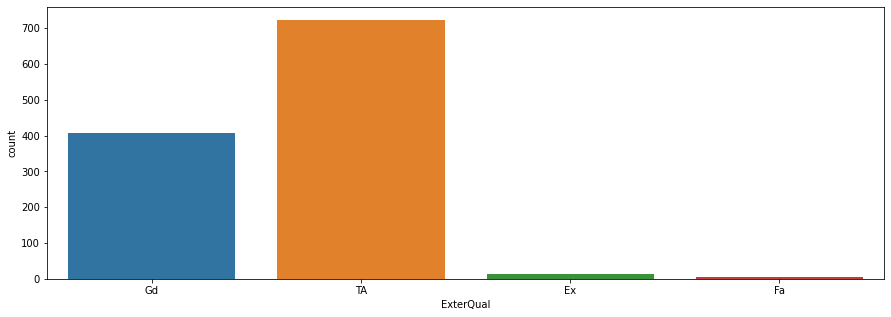

In [109]:
countplot(data,'ExterQual')

These "quality" type columns I tend to exclude them, because it is difficult to say, precisely, whether material 'X' of the house 'Y' is from a good quality. What is considered 'good' for some may be 'average' for others. For the moment, I will choose to delete.

In [110]:
data.drop('ExterQual', axis=1, inplace=True)
data.shape

(1149, 39)

### ExterCond 
- Present condition of the material on the exterior

ExterCond
TA    1021
Gd     110
Fa      16
Ex       2
Name: count, dtype: int64


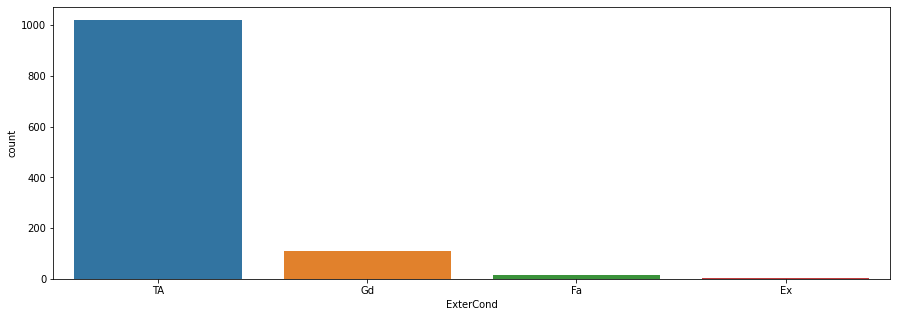

In [111]:
countplot(data,'ExterCond')

Same as above.

In [112]:
data.drop('ExterCond', axis=1, inplace=True)
data.shape

(1149, 38)

### Foundation 
- Type of foundation

Foundation
PConc     518
CBlock    508
BrkTil    115
Stone       5
Wood        3
Name: count, dtype: int64


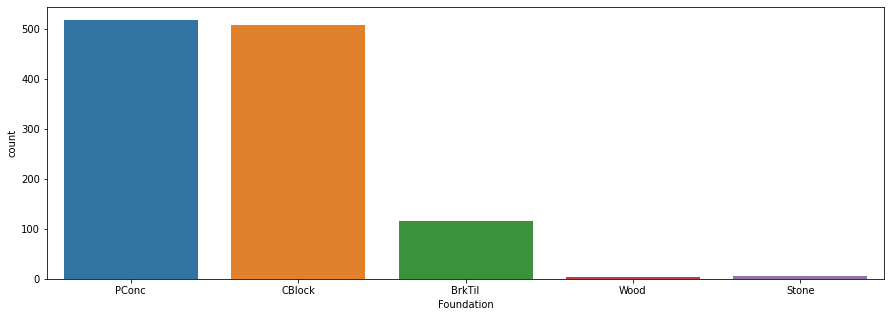

In [113]:
countplot(data,'Foundation')

I don't think this variable is a good predictor. I will choose to remove.

In [114]:
data.drop('Foundation', axis=1, inplace=True)
data.shape

(1149, 37)

### BsmtQual 
- Height of the basement

BsmtQual
TA    531
Gd    530
Ex     56
Fa     32
Name: count, dtype: int64


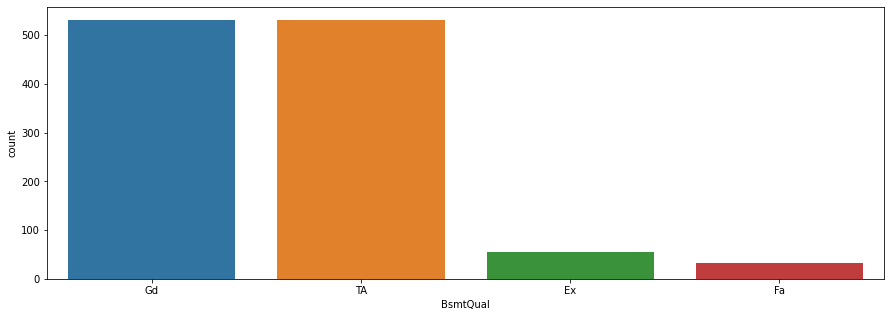

In [115]:
countplot(data,'BsmtQual')

Height of the basement. We'll use it.

* Ex - Excellent (100+ inches)	
* Gd - Good (90-99 inches)
* TA - Typical (80-89 inches)
* Fa - Fair (70-79 inches)
* Po - Poor (<70 inches
* NA - No Basement

### CentralAir - Central air conditioning

CentralAir
Y    1097
N      52
Name: count, dtype: int64


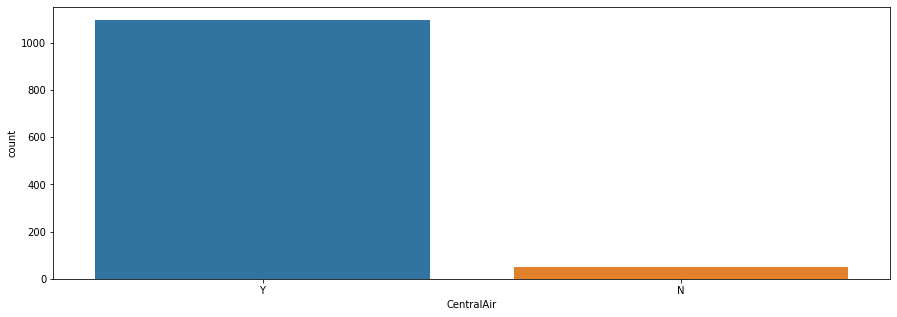

In [116]:
countplot(data,'CentralAir')

This appears to be a good predictor. We don't need to do any transformations here for now.

### Electrical 
- Electrical system

Electrical
SBrkr    1063
FuseA      66
FuseF      17
FuseP       2
Mix         1
Name: count, dtype: int64


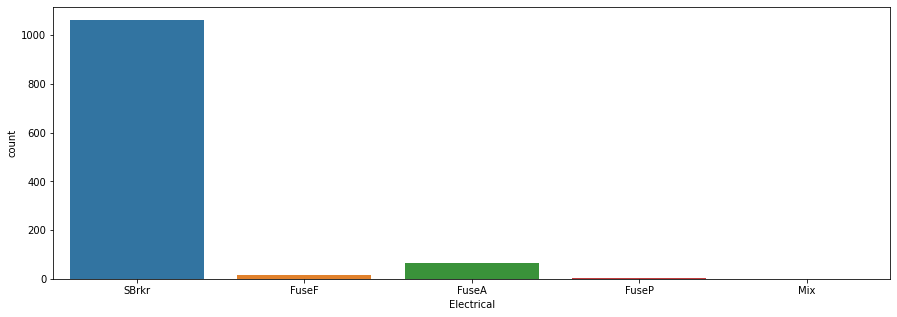

In [117]:
countplot(data,'Electrical')

I'm going to remove that variable. Looking at the data, I believe that 'SBrkr - Standard Circuit Breakers & Romex' is the 'standard pattern' for those houses, varying only the power grid capacity. However, I believe that the 'standard' will suit most people. Thus, I believe that it does not impact that much on our model.

In [118]:
data.drop('Electrical', axis=1, inplace=True)
data.shape

(1149, 36)

### KitchenQual 
- Kitchen quality

KitchenQual
TA    582
Gd    503
Ex     44
Fa     20
Name: count, dtype: int64


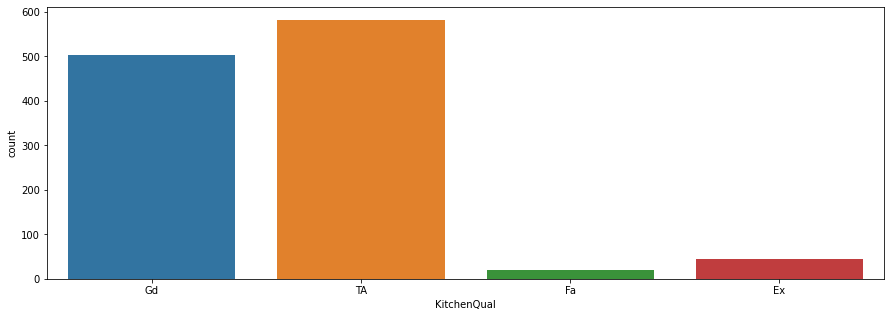

In [119]:
countplot(data,'KitchenQual')

I'm going to exclude this "quality" type variable because I believe it will heavily influence our model in a way that makes prediction "easier". We want to predict more easily, but having a variable that guides us with too much influence towards a specific result won't be of much use (in this exercise). You can use it if you prefer.

In [120]:
data.drop('KitchenQual', axis=1, inplace=True)
data.shape

(1149, 35)

### GarageType 
- Garage location

GarageType
Attchd     721
Detchd     344
BuiltIn     60
Basment     16
CarPort      5
2Types       3
Name: count, dtype: int64


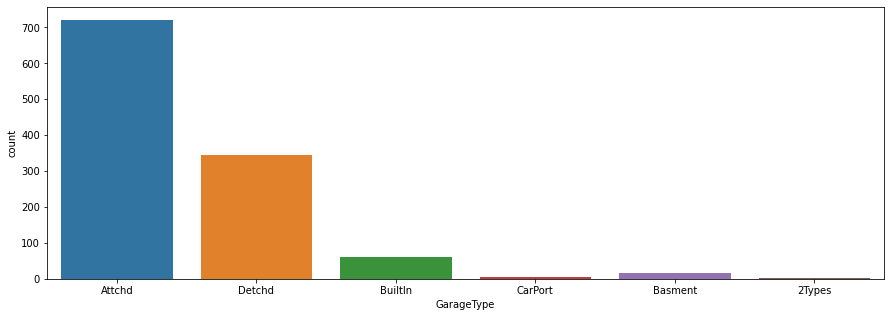

In [121]:
countplot(data,'GarageType')

### GarageFinish 
- Interior finish of the garage

GarageFinish
Unf    523
RFn    369
Fin    257
Name: count, dtype: int64


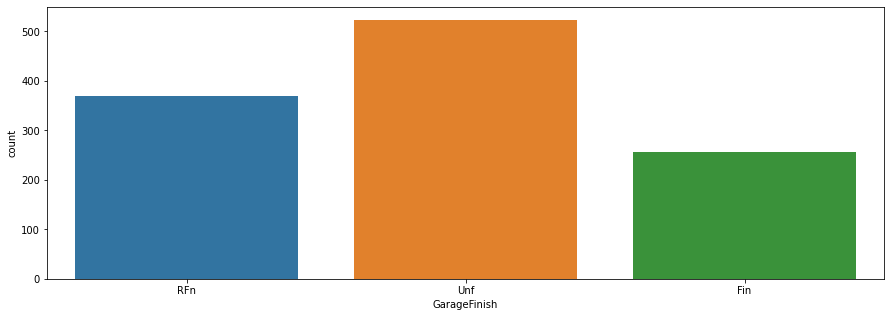

In [122]:
countplot(data,'GarageFinish')

We don't need to do anything here. We're going to use it like this.

### GarageQual 
- Garage quality

GarageQual
TA    1089
Fa      43
Gd      12
Po       3
Ex       2
Name: count, dtype: int64


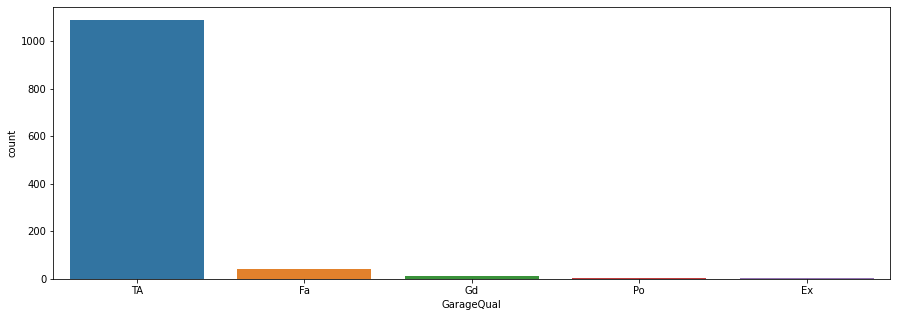

In [123]:
countplot(data,'GarageQual')

Let's try keeping this "quality" type column and see what happens.

### GarageCond 
- Garage condition

GarageCond
TA    1101
Fa      33
Gd       7
Po       6
Ex       2
Name: count, dtype: int64


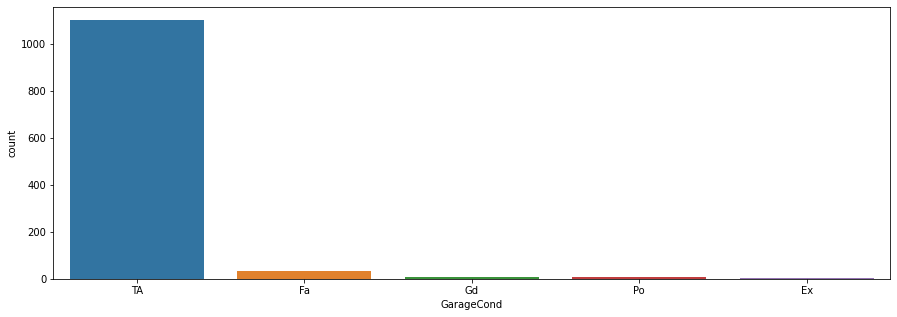

In [124]:
countplot(data,'GarageCond')

Most garages are in these two conditions - 'Average' or 'Fair'. I prefer to remove this variable.

In [125]:
data.drop('GarageCond', axis=1, inplace=True)
data.shape

(1149, 34)

### PavedDrive 
- Paved driveway

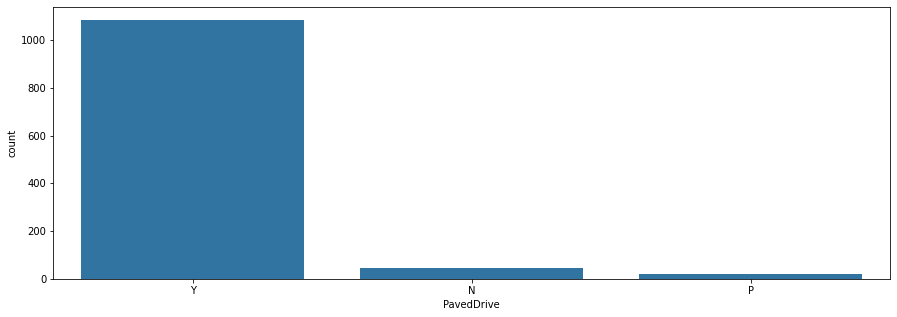

In [126]:
barplot(data['PavedDrive'])

Let's see if this variable is good for the model.

### SaleType 
- Type of sale

SaleType
WD       1020
New        74
COD        39
ConLD       5
ConLw       4
ConLI       2
CWD         2
Con         2
Oth         1
Name: count, dtype: int64


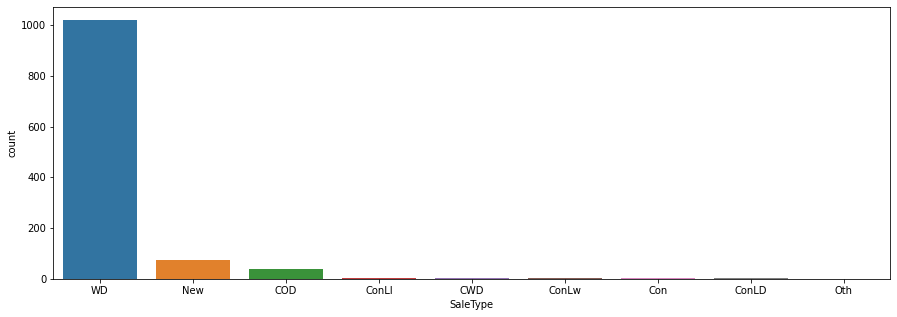

In [127]:
countplot(data,'SaleType')

I'm going to choose to discard this variable and just use the 'SaleCondition' variable.

In [128]:
data.drop('SaleType', axis=1, inplace=True)
data.shape

(1149, 33)

### SaleCondition 
- Condition of sale

SaleCondition
Normal     975
Abnorml     76
Partial     76
Family      17
Alloca       4
AdjLand      1
Name: count, dtype: int64


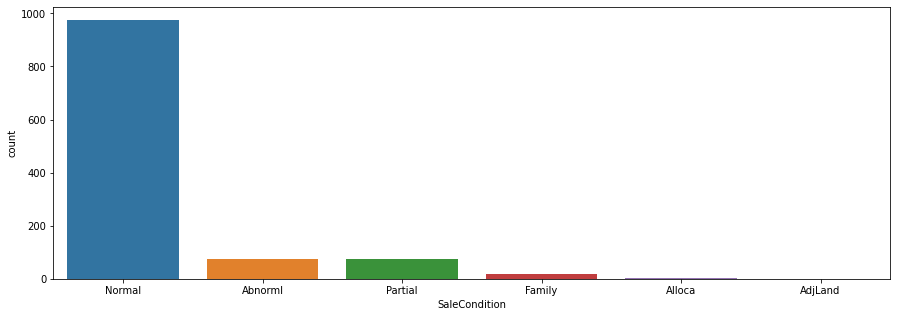

In [129]:
countplot(data,'SaleCondition')

I think this variable can be a good one for the model, so I'll try to use it that way at first.

### Encoding
- Now let's convert categorical data into a numerical format that can be used by our machine learning algorithms.

In [130]:
print(data.dtypes)
print('-'*50)
print(data.iloc[0])

LotFrontage      float64
LotArea            int64
LotConfig         object
Neighborhood      object
BldgType          object
HouseStyle        object
YearBuilt          int64
Exterior1st       object
BsmtQual          object
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
CentralAir        object
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType        object
GarageFinish      object
GarageArea         int64
GarageQual        object
PavedDrive        object
OpenPorchSF        int64
EnclosedPorch      int64
MoSold             int64
YrSold             int64
SaleCondition     object
SalePrice          int64
Bathrooms          int64
HalfBaths          int64
Category          object
MS_Zoning         object
Lot_shape         object
dtype: object
--------------------------------------------------
LotFrontage                65.0
LotArea                    8450
LotConfig                Inside
Neighborhood  

In [131]:
data_cod = data.copy()

cat_columns = ['CentralAir', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st', 'BsmtQual', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleCondition', 'Category', 'MS_Zoning', 'Lot_shape']

data_cod = pd.get_dummies(data=data_cod, columns = cat_columns)

display(data_cod.head())

LotFrontage  LotArea  YearBuilt  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450       2003         706        150          856   
1         80.0     9600       1976         978        284         1262   
2         68.0    11250       2001         486        434          920   
3         60.0     9550       1915         216        540          756   
4         84.0    14260       2000         655        490         1145   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  \
0             3             1             8           0         548   
1             3             1             6           1         460   
2             3             1             6           1         608   
3             3             1             7           1         642   
4             4             1             9           1         836   

   OpenPorchSF  EnclosedPorch  MoSold  YrSold  SalePrice  Bathrooms  \
0           61              0       2    2008     208500          3   
1            0              0       5    2007     181500          2   
2           42              0       9    2008     223500          3   
3           35            272       2    2006     140000          2   
4           84              0      12    2008     250000          3   

   HalfBaths  CentralAir_N  CentralAir_Y  LotConfig_Corner  LotConfig_CulDSac  \
0          1         False          True             False              False   
1          1         False          True             False              False   
2          1         False          True             False              False   
3          0         False          True              True              False   
4          1         False          True             False              False   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blmngtn  \
0          False          False              True                 False   
1           True          False             False                 False   
2          False          False              True                 False   
3          False          False             False                 False   
4           True          False             False                 False   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                 False                False                 False   
1                 False                False                 False   
2                 False                False                 False   
3                 False                False                 False   
4                 False                False                 False   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                 False                  True                 False   
1                 False                 False                 False   
2                 False                  True                 False   
3                 False                 False                  True   
4                 False                 False                 False   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                 False                 False                False   
1                 False                 False                False   
2                 False                 False                False   
3                 False                 False                False   
4                 False                 False                False   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   
3                 False                 False               False   
4                 False                 False               False   

   Neighborhood_NPkVill  Neighborhood_NWAmes  ...  HouseStyle_1Fam  \
0           

### Train x Test
- Splitting the data into X and y

In [132]:
X = data_cod.drop('SalePrice', axis=1)
y = data_cod['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Feature Scaling
- Let's normalize the features of our dataset so that they are on the same scale, improving the performance of the ML algorithms.

In [133]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
X_train

array([[ 0.81743919,  0.28738353,  0.17503918, ...,  0.07071068,
        -0.73099326,  0.73099326],
       [ 0.12466547,  2.17948729, -0.09295701, ...,  0.07071068,
         1.36800167, -1.36800167],
       [ 0.65695159,  0.15672675, -0.6289494 , ...,  0.07071068,
        -0.73099326,  0.73099326],
       ...,
       [ 0.12466547,  1.46329456, -0.46145178, ...,  0.07071068,
        -0.73099326,  0.73099326],
       [ 0.12466547, -1.50858265,  1.07952634, ...,  0.07071068,
        -0.73099326,  0.73099326],
       [ 0.12466547,  0.80710717,  0.20853871, ...,  0.07071068,
         1.36800167, -1.36800167]])

In [135]:
X_test

array([[-1.32239555,  0.50095091,  0.81153015, ...,  0.07071068,
         1.36800167, -1.36800167],
       [ 0.81743919,  0.4212664 ,  1.24702396, ...,  0.07071068,
        -0.73099326,  0.73099326],
       [-0.84093273, -0.91046494, -1.46643751, ...,  0.07071068,
        -0.73099326,  0.73099326],
       ...,
       [-0.41296579, -0.61753566, -0.72944798, ...,  0.07071068,
        -0.73099326,  0.73099326],
       [ 0.9779268 ,  0.40836203,  0.4765349 , ...,  0.07071068,
         1.36800167, -1.36800167],
       [-0.41296579,  0.32900013, -1.06444322, ...,  0.07071068,
        -0.73099326,  0.73099326]])

# 4. **Modeling**:

- In the "Modeling" phase of CRISP-DM, the main focus is to build machine learning models to solve the problem.
- This phase involves selecting the modeling algorithm, training, and evaluating the model.

### Model Evaluation

In [136]:
def evaluate_model(model, y_test, prediction):
    r2 = r2_score(y_test, prediction)
    mae = mean_absolute_error(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    return f'\tModel: {model}:\nR² Score: {r2:.5f}\nMean Absolute Error: {mae:.3f}\nRoot Mean Square Error: {rmse:.3f}\n----------'

### Model Selection

In [137]:
metrics = pd.DataFrame(columns=["Model", "R2 Score", "RMSE", "MAE", "Eval Time"])

In [138]:
model_lr = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_elastic = ElasticNet()
model_rfr = RandomForestRegressor()
model_adaboost = AdaBoostRegressor()

models = {'Linear Regression': model_lr,
         'Ridge Regression': model_ridge,
         'Lasso Regression': model_lasso,
         'Elastic Net Regression': model_elastic,
         'Random Forest Regression': model_rfr,
         'AdaBoost Regression': model_adaboost
         }

for name, model in tqdm(models.items()):
    start = time.time()  # Start time
    
    # Get the actual model from the dictionary
    reg_model = models[name]
    
    reg_model.fit(X_train, y_train)
    prediction = reg_model.predict(X_test)
    
    # Calculate metrics
    r_squared = r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    mae = mean_absolute_error(y_test, prediction)
    
    end = time.time()  # End time
    eval_time = end - start  # Calculate evaluation time
    
    
    
    # Add results to DataFrame
    new_row = pd.DataFrame([{
        "Model": name,
        "R2 Score": r_squared,
        "RMSE": rmse,
        "MAE": mae,
        "Eval Time": eval_time
    }])
    metrics = pd.concat([metrics, new_row], ignore_index=True)

# Display the models DataFrame
metrics


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.06it/s]


Model  R2 Score          RMSE           MAE  Eval Time
0         Linear Regression  0.826702  22091.270317  16433.714414   0.294336
1          Ridge Regression  0.828739  21961.097988  16259.926540   0.000000
2          Lasso Regression  0.828403  21982.597729  16270.745528   0.140607
3    Elastic Net Regression  0.822478  22358.886451  16654.457409   0.000000
4  Random Forest Regression  0.810117  23124.227028  16345.412725   1.200292
5       AdaBoost Regression  0.734044  27367.118237  20482.519130   0.301905

Let's arrange them in descending order by RMSE.

In [139]:
metrics.sort_values(by="RMSE")

Model  R2 Score          RMSE           MAE  Eval Time
1          Ridge Regression  0.828739  21961.097988  16259.926540   0.000000
2          Lasso Regression  0.828403  21982.597729  16270.745528   0.140607
0         Linear Regression  0.826702  22091.270317  16433.714414   0.294336
3    Elastic Net Regression  0.822478  22358.886451  16654.457409   0.000000
4  Random Forest Regression  0.810117  23124.227028  16345.412725   1.200292
5       AdaBoost Regression  0.734044  27367.118237  20482.519130   0.301905

The Linear Regression algorithm gave us a very poor and outlier value. Since we won't be using it, let's remove it so it doesn't affect the scale of our upcoming plots.

In [140]:
metrics = metrics.drop(0)

In [141]:
metrics.sort_values(by="RMSE")

Model  R2 Score          RMSE           MAE  Eval Time
1          Ridge Regression  0.828739  21961.097988  16259.926540   0.000000
2          Lasso Regression  0.828403  21982.597729  16270.745528   0.140607
3    Elastic Net Regression  0.822478  22358.886451  16654.457409   0.000000
4  Random Forest Regression  0.810117  23124.227028  16345.412725   1.200292
5       AdaBoost Regression  0.734044  27367.118237  20482.519130   0.301905

# 5. **Evaluation**:

- In the "Evaluation" phase of CRISP-DM, the goal is to assess the performance of the model built in the previous phase.
- This involves model validation using appropriate metrics, interpreting the results, and verifying if the model meets the established success criteria.

In [142]:
metrics.sort_values(by="RMSE")

Model  R2 Score          RMSE           MAE  Eval Time
1          Ridge Regression  0.828739  21961.097988  16259.926540   0.000000
2          Lasso Regression  0.828403  21982.597729  16270.745528   0.140607
3    Elastic Net Regression  0.822478  22358.886451  16654.457409   0.000000
4  Random Forest Regression  0.810117  23124.227028  16345.412725   1.200292
5       AdaBoost Regression  0.734044  27367.118237  20482.519130   0.301905

### Hyperparameter tuning

You can choose one or some of your models to find and adjust the hyperparameter to increase the performance of your machine learning algorithm. I will do this for every model I have trained, just for my "personal training".

#### Ridge Regression

- [You can find more about the Ridge Regression algorithm HERE](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [143]:
def ridge_regressor_tuning(X, y):
    # Start time
    start = time.time()
    
    # Kfolds
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    #alpha=np.array([1.0, 2.0, 3.0, 4.0, 4.3, 4.4])
    alpha=np.array([1e-3, 1e-2, 1e-1, 1])
    tol=np.array([0.0001, 0.001, 0.01, 0.1])
    solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    param_grid={'alpha':alpha, 'tol':tol, 'solver':solver}
    
    # ML Model
    ridge_regressor = Ridge()
    
    # GridSearchCV
    grid_ridge = GridSearchCV(ridge_regressor, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_ridge.fit(X, y)
    
    # Predictions
    y_pred = grid_ridge.predict(X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # End time
    end = time.time()
    eval_time = end - start
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_ridge.best_score_}')
    print(f'R²: {r2}')
    print(f'RMSE: {rmse}')
    print(f'Best estimators: {grid_ridge.best_estimator_}')
    print(f'Tuning these hyperparameters took {eval_time:.2f} seconds.')

In [144]:
ridge_regressor_tuning(X_train, y_train)

BEST RESULTS:
Best score: 0.8420835910761812
R²: 0.8818737204001047
RMSE: 18796.369818896517
Best estimators: Ridge(solver='saga', tol=0.01)
Tuning these hyperparameters took 14.79 seconds.


This is the same algorithm, but with built-in cross-validation.

- [You can find more about the RidgeCV algorithm HERE](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [145]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas=[1.0, 2.0, 3.0, 4.0, 4.3, 4.4], cv=5).fit(X_train, y_train)
print(ridgecv.best_score_)

0.8422681280784131


#### Lasso Regression

- [You can find more about the Lasso Regression algorithm HERE](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [146]:
def lasso_regressor_tuning(X, y):
    # Start time
    start = time.time()
    
    # Kfolds
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    alpha = np.array([4.51, 4.52, 4.53, 4.54])
    max_iter = np.array([1450, 1500, 1550])
    tol = np.array([0.08, 0.09, 0.1, 0.2])
    warm_start = [False, True]
    selection = ['cyclic', 'random']
    param_grid = {'alpha':alpha, 'max_iter':max_iter, 'tol':tol, 'warm_start':warm_start, 'selection':selection}
    
    # ML Model
    lasso_regressor = Lasso()
    
    # GridSearchCV
    grid_lasso = GridSearchCV(lasso_regressor, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_lasso.fit(X, y)
    
    # Predictions
    y_pred = grid_lasso.predict(X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # End time
    end = time.time()
    eval_time = end - start
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_lasso.best_score_}')
    print(f'R²: {r2}')
    print(f'RMSE: {rmse}')
    print(f'Best estimators: {grid_lasso.best_estimator_}')
    print(f'Tuning these hyperparameters took {eval_time:.2f} seconds.')

In [147]:
lasso_regressor_tuning(X_train, y_train)

BEST RESULTS:
Best score: 0.8432888914421806
R²: 0.8790325971991582
RMSE: 19021.067920082904
Best estimators: Lasso(alpha=4.52, max_iter=1550, selection='random', tol=0.09, warm_start=True)
Tuning these hyperparameters took 2.26 seconds.


#### Elastic Net Regression

- [You can find more about the Elastic Net Regression algorithm HERE](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [148]:
def elasticnet_regressor_tuning(X, y):
    # Start time
    start = time.time()
    
    # Kfolds
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    alpha = np.array([1.0, 1.1, 1,2])
    l1_ratio = np.array([0.7, 0.8, 0.9, 1.0])
    max_iter = np.array([1950, 2000, 2050])
    tol = np.array([0.001, 0.01, 0.1, 0.2])
    warm_start = [True, False]
    selection = ['cyclic', 'random']
    param_grid = {'alpha':alpha, 'l1_ratio':l1_ratio, 'max_iter':max_iter, 'tol':tol, 'warm_start':warm_start, 'selection':selection}
    
    # ML Model
    elasticnet_regressor = ElasticNet()
    
    # GridSearchCV
    grid_elasticnet = GridSearchCV(elasticnet_regressor, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_elasticnet.fit(X, y)
    
    # Predictions
    y_pred = grid_elasticnet.predict(X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # End time
    end = time.time()
    eval_time = end - start
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_elasticnet.best_score_}')
    print(f'R²: {r2}')
    print(f'RMSE: {rmse}')
    print(f'Best estimators: {grid_elasticnet.best_estimator_}')
    print(f'Tuning these hyperparameters took {eval_time:.2f} seconds.')

In [149]:
elasticnet_regressor_tuning(X_train, y_train)

BEST RESULTS:
Best score: 0.8471232582942816
R²: 0.8778452865767458
RMSE: 19114.187098307506
Best estimators: ElasticNet(l1_ratio=0.9, max_iter=1950, selection='random', tol=0.1)
Tuning these hyperparameters took 37.47 seconds.


#### Random Forest Regression

- [You can find more about the Random Forest Regression algorithm HERE](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [150]:
def random_forest_regressor_tuning(X, y):
    # Start time
    start = time.time()
    
    # Kfolds
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    n_estimators = np.array([100, 200])
    criterion = ['absolute_error','friedman_mse']
    param_grid = {'n_estimators':n_estimators, 'criterion':criterion}
    
    # ML Model
    random_forest_regressor = RandomForestRegressor()
    
    # GridSearchCV
    grid_random_forest = GridSearchCV(random_forest_regressor, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_random_forest.fit(X, y)
    
    # Predictions
    y_pred = grid_random_forest.predict(X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # End time
    end = time.time()
    eval_time = end - start
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_random_forest.best_score_}')
    print(f'R²: {r2}')
    print(f'RMSE: {rmse}')
    print(f'Best estimators: {grid_random_forest.best_estimator_}')
    print(f'Tuning these hyperparameters took {eval_time:.2f} seconds.')

In [151]:
random_forest_regressor_tuning(X_train, y_train)

BEST RESULTS:
Best score: 0.8143667207350406
R²: 0.9743832374621759
RMSE: 8753.119133056927
Best estimators: RandomForestRegressor(criterion='absolute_error', n_estimators=200)
Tuning these hyperparameters took 77.70 seconds.


#### AdaBoost Regression

- [You can find more about the AdaBoost Regression algorithm HERE](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

In [152]:
def adaboost_regressor_tuning(X, y):
    # Start time
    start = time.time()
    
    # Kfolds
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    n_estimators = np.array([50, 100])
    learning_rate = np.array([1.0, 1.1])
    loss = ['linear', 'square', 'exponential']
    param_grid = {'n_estimators':n_estimators, 'learning_rate':learning_rate, 'loss':loss}
    
    # ML Model
    adaboost_regressor = AdaBoostRegressor()
    
    # GridSearchCV
    grid_adaboost = GridSearchCV(adaboost_regressor, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_adaboost.fit(X, y)
    
    # Predictions
    y_pred = grid_adaboost.predict(X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # End time
    end = time.time()
    eval_time = end - start
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_adaboost.best_score_}')
    print(f'R²: {r2}')
    print(f'RMSE: {rmse}')
    print(f'Best estimators: {grid_adaboost.best_estimator_}')
    print(f'Tuning these hyperparameters took {eval_time:.2f} seconds.')

In [153]:
adaboost_regressor_tuning(X_train, y_train)

BEST RESULTS:
Best score: 0.7894756467425499
R²: 0.8567791114815282
RMSE: 20696.83321930198
Best estimators: AdaBoostRegressor(learning_rate=1.1, loss='square', n_estimators=100)
Tuning these hyperparameters took 9.54 seconds.


### Now it's time to add the best parameters we found to our models, evaluate and choose the best one.

Linear Regression is still pretty bad, so I'll opt not to use it at this stage.

In [154]:
best_metrics = pd.DataFrame(columns=["Model", "R2 Score", "RMSE", "MAE", "Eval Time"])

In [155]:
model_ridge = Ridge(solver='saga', tol=0.01, random_state=0)
model_lasso = Lasso(alpha=4.52, max_iter=1550, selection='random', tol=0.09, random_state=0)
model_elastic = ElasticNet(l1_ratio=0.8, max_iter=1950, selection='random', tol=0.1, warm_start=True, random_state=0)
model_rfr = RandomForestRegressor(criterion='absolute_error', random_state=0)
model_adaboost = AdaBoostRegressor(loss='square', n_estimators=100, random_state=0)

models = {'Ridge Regression': model_ridge,
         'Lasso Regression': model_lasso,
         'Elastic Net Regression': model_elastic,
         'Random Forest Regression': model_rfr,
          'AdaBoost Regression': model_adaboost
         }

for name, model in tqdm(models.items()):
    start = time.time()  # Start time
    
    # Get the actual model from the dictionary
    reg_model = models[name]
    
    reg_model.fit(X_train, y_train)
    prediction = reg_model.predict(X_test)
    
    # Calculate metrics
    r_squared = r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    mae = mean_absolute_error(y_test, prediction)
    
    end = time.time()  # End time
    eval_time = end - start  # Calculate evaluation time
    
        # Add results to DataFrame
    new_row = pd.DataFrame([{
        "Model": name,
        "R2 Score": r_squared,
        "RMSE": rmse,
        "MAE": mae,
        "Eval Time": eval_time
    }])
    best_metrics = pd.concat([best_metrics, new_row], ignore_index=True)

# Display the models DataFrame
best_metrics


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.43s/it]


Model  R2 Score          RMSE           MAE  Eval Time
0          Ridge Regression  0.833555  21650.085025  16023.196777   0.038337
1          Lasso Regression  0.828467  21978.506262  16302.960330   0.004003
2    Elastic Net Regression  0.834277  21603.109898  16126.237828   0.004996
3  Random Forest Regression  0.799464  23764.028058  16922.354957  11.545460
4       AdaBoost Regression  0.755193  26256.453223  19478.827258   0.550030

In [156]:
best_metrics.sort_values(by="RMSE")

Model  R2 Score          RMSE           MAE  Eval Time
2    Elastic Net Regression  0.834277  21603.109898  16126.237828   0.004996
0          Ridge Regression  0.833555  21650.085025  16023.196777   0.038337
1          Lasso Regression  0.828467  21978.506262  16302.960330   0.004003
3  Random Forest Regression  0.799464  23764.028058  16922.354957  11.545460
4       AdaBoost Regression  0.755193  26256.453223  19478.827258   0.550030

In [157]:
# Create the bar plot for R2 Score
r2_score_plot = go.Figure()

for model_name in best_metrics["Model"]:
    model_r2_score = best_metrics[best_metrics["Model"] == model_name]["R2 Score"].values[0]
    r2_score_plot.add_trace(
        go.Bar(x=[model_name], y=[model_r2_score], text=[f"{model_r2_score:.5f}"], name=model_name)
    )

# Update the layout
r2_score_plot.update_layout(
    title="R2 Score Comparison (higher is better)",
    xaxis_title="Model",
    yaxis_title="R2 Score",
    xaxis=dict(tickangle=45),
    height=800
)


# Create the bar plot for RMSE
rmse_plot = go.Figure()

for model_name in best_metrics["Model"]:
    model_rmse = best_metrics[best_metrics["Model"] == model_name]["RMSE"].values[0]
    rmse_plot.add_trace(
        go.Bar(x=[model_name], y=[model_rmse], text=[f"{model_rmse:.2f}"], name=model_name)
    )

# Update the layout
rmse_plot.update_layout(
    title="Root Mean Squared Error (RMSE) Comparison (lower is better)",
    xaxis_title="Model",
    yaxis_title="RMSE",
    xaxis=dict(tickangle=45),
    height=800
)


# Create the bar plot for MAE
mae_plot = go.Figure()

for model_name in best_metrics["Model"]:
    model_mae = best_metrics[best_metrics["Model"] == model_name]["MAE"].values[0]
    mae_plot.add_trace(
        go.Bar(x=[model_name], y=[model_mae], text=[f"{model_mae:.2f}"], name=model_name)
    )

# Update the layout
mae_plot.update_layout(
    title="Mean Absolute Error (MAE) Comparison (lower is better)",
    xaxis_title="Model",
    yaxis_title="MAE",
    xaxis=dict(tickangle=45),
    height=800
)


# Create the bar plot for Eval Time
eval_time_plot = go.Figure()

for model_name in best_metrics["Model"]:
    model_eval_time = best_metrics[best_metrics["Model"] == model_name]["Eval Time"].values[0]
    eval_time_plot.add_trace(
        go.Bar(x=[model_name], y=[model_eval_time], text=[f"{model_eval_time:.3f}"], name=model_name)
    )

# Update the layout
eval_time_plot.update_layout(
    title="Evaluation Time Comparison",
    xaxis_title="Model",
    yaxis_title="Eval Time (seconds)",
    xaxis=dict(tickangle=45),
    height=800
)


# Show the plots
r2_score_plot.show()
rmse_plot.show()
mae_plot.show()
eval_time_plot.show()


### I will choose the ELASTIC NET algorithm.

- The choice of the ElasticNet algorithm is supported by its remarkable performance capability, as evidenced by consistently excellent metrics such as R2 score, RMSE, and MAE. Its hybrid approach of L1 and L2 regularization allows for optimal adaptation to a wide variety of datasets, ensuring robust and highly generalizable solutions. Furthermore, its cohesive stability across multiple iterations and computational efficiency make it a highly reliable and effective option for accurate predictions in a timely manner.

# 6. **Deploy**:

- In the "Deploy" phase of CRISP-DM, the focus is on presenting the results of the Data Science project and preparing for the implementation of the model in a production environment.
- This phase can involve creating reports, visualizations, and documenting the project.
- I will import the necessary libraries again (in case the deployment file is opened in a separate file).

Since we have processed the dataset, let's export the preprocessed data and save it in '.csv' format. This step is optional and does not affect the model; it simply creates a '.csv' file with the preprocessed dataset.

In [ ]:
#X['SalePrice'] = y
#X.to_csv('data.csv')

Here, we are using the joblib library to save the trained model 'model_elastic' to the file 'model_elastic.joblib'. This allows the model to be stored on disk for future use, avoiding the need to retrain it.

In [162]:
import joblib
joblib.dump(model_elastic, 'model_elastic.joblib')

['model_elastic.joblib']

Below is the code to perform the deployment. Run it in a separate file. Then, still here in jupyter, save the file in a ".py" extension (Go to File > Download as > Python(.py). I saved mine with the name "deploy.py".

In [ ]:
import pandas as pd
import streamlit as st
import joblib

x_number = {'LotFrontage': 0, 'LotArea': 0, 'YearBuilt': 0, 'BsmtFinSF1': 0, 'BsmtUnfSF': 0,
       'TotalBsmtSF': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'TotRmsAbvGrd': 0,
       'Fireplaces': 0, 'GarageArea': 0, 'OpenPorchSF': 0, 'EnclosedPorch': 0, 'MoSold': 0,
       'YrSold': 0, 'Bathrooms': 0, 'HalfBaths': 0}

x_list = {'LotConfig':['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 
          'Neighborhood':['NAmes', 'CollgCr', 'OldTown', 'Somerst', 'Gilbert', 'Edwards',
                          'NWAmes', 'Sawyer', 'SawyerW', 'BrkSide', 'Crawfor', 'NridgHt',
                          'Mitchel', 'Timber', 'IDOTRR', 'NoRidge', 'SWISU', 'Blmngtn', 'BrDale',
                          'StoneBr', 'MeadowV', 'ClearCr', 'Veenker', 'NPkVill', 'Blueste'], 
          'BldgType':['1Fam', 'Townhouse', '2fmCon', 'Duplex'], 
          'HouseStyle':['Townhouse', '1Fam', '2fmCon'], 
          'Exterior1st':['diverse_siding', 'wood_style_siding', 'rock_style_siding'],
          'BsmtQual':['TA', 'Gd', 'Ex', 'Fa'], 
          'CentralAir':['Y', 'N'], 
          'GarageType':['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], 
          'GarageFinish':['Unf', 'RFn', 'Fin'],
          'GarageQual':['TA', 'Fa', 'Gd', 'Po', 'Ex'], 
          'PavedDrive':['Y', 'N', 'P'], 
          'SaleCondition':['Normal', 'Abnorml', 'Partial', 'Family', 'Alloca', 'AdjLand'], 
          'Category':['one_story', 'two_story', 'others'], 
          'MS_Zoning':['residential', 'industrial'],
          'Lot_shape':['regular', 'irregular']}

dictionary = {}
for item in x_list:
    for value in x_list[item]:
        dictionary[f'{item}_{value}'] = 0


for item in x_number:
    if item == 'LotFrontage':
        value = st.number_input(f'{item}', step=0.01, value=0.0, format="%.2f")
    else:
        value = st.number_input(f'{item}', step=1, value=0)
    x_number[item] = value 
    
for item in x_list:
    value = st.selectbox(f'{item}', x_list[item])
    dictionary[f'{item}_{value}'] = 1
    
button = st.button('Predict property value')

if button:
    dictionary.update(x_number)
    x_values = pd.DataFrame(dictionary, index=[0])
    model = joblib.load('model_elastic.joblib')
    price = model.predict(x_values)
    st.write(f'This property has the suggested price of: {price[0]:,.2f}')


Now, open the Anaconda Prompt, navigate to the folder where the model is to run it.

![anaconda prompt](img/anaconda.png)

Enter the data and click “Predict property value”.
![deploy final](img/site.png)

# You have reached the end. Congratulations!

We are pleased to announce the **successful completion of our data science project**. We have navigated through *all phases of the CRISP-DM methodology*, from understanding the problem to practical implementation with a website on the local network. Through our dedication, we have not only built a robust predictive model but also made it available for *real-world use*.

I hope that has been helpful and insightful. **If you found value in my efforts, please consider giving me a up vote**. Your appreciation motivates me to keep exploring the world of data and sharing our findings.

Thank you for your participation and ongoing support!

**Best regards**,

**Henrique**.